In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

from platform import python_version

print("Current Python Version-", python_version())


Current Python Version- 3.7.14


In [ ]:
import numpy
numpy.version.version

'1.21.6'

In [ ]:
pip show pandas

Name: pandas
Version: 1.3.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.7/dist-packages
Requires: python-dateutil, pytz, numpy
Required-by: xarray, vega-datasets, statsmodels, sklearn-pandas, seaborn, pymc, prophet, plotnine, pandas-profiling, pandas-gbq, pandas-datareader, mlxtend, mizani, holoviews, gspread-dataframe, google-colab, fix-yahoo-finance, fastai, datascience, cufflinks, cmdstanpy, arviz, altair


# ANALISE DE DADOS DE VENDAS DE JOGOS 

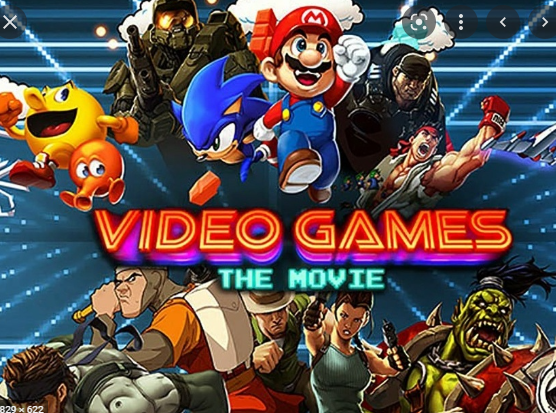

Esse projeto foi construido com o interesse de sabermos o comportamento do interesse de jovens e adultos na compra de jogos, quais os estilos de jogos que foram mais comprados e montar uma linha de perfil do usuário gamer de dados de 1980 até 2020. Nosso principal propósito é responder as seguintes perguntas:     
* Quais melhores jogos vendidos por gênero ? 
* Quais melhores plataformas de lançamento para jogos  ? 
* O que define um bom jogo ? 
* Qual o comportamento esperado nos próximos 10 anos ?

o dataset originalmente foi coletado pela plataforma online Kaggle, conhecida como um site de competiçoes para uso e técnicas aplicadas a Machine Learning.
* Conjunto de dados : https://www.kaggle.com/code/lunaliu2/video-game-sales-analysis/data?select=Video_Games_Sales_as_at_22_Dec_2016.csv
* Web Scraping da fonte de dados : https://www.vgchartz.com/

Aqui podemos ver um breve explicado do contéudo do conjunto de dados amostrado

* Name - O título do Jogo
* Platform - Por qual plataforma o jogo foi liberado (e.g. PC, Wii etc.)
* Year_of_Release - Ano de lançamento
* Genre - Gênero do jogo (as classified by vgchartz)
* Publisher - A empresa que publicou o lançamento
* NA_Sales - Vendas na Ámerica do Norte (in millions)
* EU_Sales - Vendas na Europa(in millions)
* JP_Sales - Vendas no Japão (in millions)
* Other_Sales - Venda em outos países (in millions)
* Global_Sales - Total de Vendas ao redor do Mundo (in millions)
* Critic_Score - Pontuação média arredondada dada a um jogo pelos críticos (um inteiro de 100)
* Critic_Count -Número de pontuações críticas dadas
* User_Score -Pontuação média arredondada dada a um jogo pelos usuários do vgchartz (para o décimo mais próximo)
* User_Count - Número de pontuações do usuário fornecidas
* Developer - A empresa que desenvolveu o videogame
* Classificação - Classificação oficial ESRB



 # Importantes insights que queremos extrair dos dados :
 * Qual o melhor jogo em questão de faturamento e melhor avaliação da crítica por plataforma ?
 * Qual foi o melhor anos dentro os 40 anos trabalhados em questão de faturamento ?
 * Como saber o faturamento do jogo antes de seu lançamento, baseado no perfil do usuário.
 * O quanto a classificação indicativa ou o gênero do jogo influência na sua venda ?


### IMPORTAÇÃO DE BLIBLIOTECAS 

*  Abaixo temos um conjunto de dados que elucida a venda de jogos



In [ ]:
#Fazendo importação das bibliotecas necessárias para extração, transformação e carregamento dos dados.
import os 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import plotly.express as px 


In [ ]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

print('matplotlib: {}'.format(matplotlib.__version__))

The scikit-learn version is 1.0.2.
matplotlib: 3.2.2


In [ ]:
#sony = pd.read_csv('/content/drive/MyDrive/Colab Notebook/PS4_GamesSales.csv',encoding='unicode_escape') # Lendo o dataset com pandas
#xboxone = pd.read_csv('/content/drive/MyDrive/Colab Notebook/XboxOne_GameSales.csv',encoding='unicode_escape')
vg = pd.read_csv('/content/drive/MyDrive/Colab Notebook/vgsales.csv')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebook/Video_Games_Sales_as_at_22_Dec_2016.csv') # Lendo o dataset com pandas


## 1 .Descrição e visão geral sobre os dados brutos

In [ ]:
data.info() # Verificando inforamções do tipo de dados e a presenção de dados nullos, memória usada , quantidade de colunas
# e quantas linhas o dado tem

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


Em uma visão geral, temos 16 mil valores de vendas pra trabalharmos igualmente com Nome, Platafroma, Gênro, Ano de lançamento.  
Valores inferiores se tratando de Desenvoledores e Classificação indicativa e Pontuação. Segue abaixo melhores detalhes :
* Nome > 16 Mil
* Plataforma > 16 Mil 
* Vendas > 16 Mil
* Ano de Lançamento > 16 Mil 
* Crítica de Usuário e da crítica > 8 Mil
* Classificação > 10 Mil 

In [ ]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            55792 non-null  int64  
 1   Name            55792 non-null  object 
 2   basename        55792 non-null  object 
 3   Genre           55792 non-null  object 
 4   ESRB_Rating     23623 non-null  object 
 5   Platform        55792 non-null  object 
 6   Publisher       55792 non-null  object 
 7   Developer       55775 non-null  object 
 8   VGChartz_Score  0 non-null      float64
 9   Critic_Score    6536 non-null   float64
 10  User_Score      335 non-null    float64
 11  Total_Shipped   1827 non-null   float64
 12  Global_Sales    19415 non-null  float64
 13  NA_Sales        12964 non-null  float64
 14  PAL_Sales       13189 non-null  float64
 15  JP_Sales        7043 non-null   float64
 16  Other_Sales     15522 non-null  float64
 17  Year            54813 non-null 

Esse outro dataset foi gerado por Web Scraping em 2022 contendo mais informações relevantes e podemos relacionar as tuas tabelas pra aumentar nosso conjunto de dados
* Nome > 55 Mil
* Plataforma > 55 Mil 
* Vendas > 15 Mil
* Ano de Lançamento > 55 Mil 
* Crítica de Usuário e da crítica > 6 Mil
* Classificação > 20 Mil 

In [ ]:
vg.fillna(np.nan)
vg.head(5)

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


No dataset geral vemos muitas colunas sem uso pro nosso propósito que vamos descartar e estas não vao alterar no nosso resultado

In [ ]:
data.head(5) #printando as primeiras 10 linhas do dataset

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
colvg = vg.columns
coldata = data.columns
print ( " COLUNAS DO DATASET VG {} \n  COLUNAS DO DATASET DATA {}".format(colvg , coldata) ) 
vg = vg.rename(columns= {'ESRB_Rating':'Rating','Year':'Year_of_Release','PAL_Sales':'EU_Sales'})

 COLUNAS DO DATASET VG Index(['Rank', 'Name', 'basename', 'Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer', 'VGChartz_Score', 'Critic_Score',
       'User_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales',
       'JP_Sales', 'Other_Sales', 'Year', 'Last_Update', 'url', 'status',
       'Vgchartzscore', 'img_url'],
      dtype='object') 
  COLUNAS DO DATASET DATA Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


Apagando colunas sem utilidade para o nosso propósito 

In [ ]:
#xboxone = xboxone.drop(columns=['Pos','Global'])
data = data.drop(columns=['Global_Sales','Critic_Count'])
vg = vg.drop(columns=['Rank', 'basename', 'VGChartz_Score','Total_Shipped', 'Global_Sales', 'Last_Update', 'url', 'status',
       'Vgchartzscore', 'img_url'])

Fazendo uma união da tabela vg e data , expadindo nosso dataset pra trabalhar com os dados

In [ ]:
vgsales = pd.merge(data,vg, on =['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score',
        'User_Score', 'Developer', 'Rating' ], how = 'outer' )
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72507 entries, 0 to 72506
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             72505 non-null  object 
 1   Platform         72507 non-null  object 
 2   Year_of_Release  71259 non-null  float64
 3   Genre            72505 non-null  object 
 4   Publisher        72453 non-null  object 
 5   NA_Sales         29679 non-null  float64
 6   EU_Sales         29904 non-null  float64
 7   JP_Sales         23758 non-null  float64
 8   Other_Sales      32237 non-null  float64
 9   Critic_Score     14673 non-null  float64
 10  User_Score       7925 non-null   float64
 11  User_Count       7590 non-null   float64
 12  Developer        65867 non-null  object 
 13  Rating           33569 non-null  object 
dtypes: float64(8), object(6)
memory usage: 8.3+ MB


In [ ]:
vgsales = vgsales.drop_duplicates(subset=['Genre','Name','Platform','Year_of_Release'])
vgsales['Global_Sales'] = vgsales['EU_Sales'] + vgsales['JP_Sales']+ vgsales['NA_Sales'] + vgsales['Other_Sales'] #MONTANDO COLUNA DE VENDAS GLOBAIS 
vgsales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,8.0,322.0,Nintendo,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.0,8.0,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72502,Indivisible,PC,2019.0,Role-Playing,505 Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lab Zero Games,NaN,NaN
72503,Lost Ember,PC,2019.0,Adventure,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mooneye Studios,RP,NaN
72504,Lost Ember,PS4,2019.0,Adventure,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mooneye Studios,RP,NaN
72505,Lost Ember,XOne,2019.0,Adventure,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mooneye Studios,RP,NaN


## 1.2 Valores Nulos  & Correlação


In [ ]:
print("rows before removing missing values", vgsales.shape[0])
df2 = vgsales.replace(np.nan, 0)
df2 = vgsales.dropna()
df2.isna().sum()

rows before removing missing values 60124


Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Critic_Score       0
User_Score         0
User_Count         0
Developer          0
Rating             0
Global_Sales       0
dtype: int64

In [ ]:
df2.shape

(6824, 15)

### Consultando dados correlacionados

In [ ]:
vgsales.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,User_Count,Global_Sales
Year_of_Release,1.000000,-0.099977,0.016785,-0.171823,0.036432,-0.031945,-0.237164,0.175365,-0.065861
NA_Sales,-0.099977,1.000000,0.744864,0.437453,0.631354,0.142013,0.086085,0.246426,0.936453
EU_Sales,0.016785,0.744864,1.000000,0.412979,0.731002,0.108634,0.055767,0.283357,0.896944
JP_Sales,-0.171823,0.437453,0.412979,1.000000,0.281483,0.023455,0.127287,0.075635,0.600974
Other_Sales,0.036432,0.631354,0.731002,0.281483,1.000000,0.107316,0.057420,0.238979,0.753743
Critic_Score,-0.031945,0.142013,0.108634,0.023455,0.107316,1.000000,0.472477,0.264409,0.133919
User_Score,-0.237164,0.086085,0.055767,0.127287,0.057420,0.472477,1.000000,0.027030,0.089108
User_Count,0.175365,0.246426,0.283357,0.075635,0.238979,0.264409,0.027030,1.000000,0.265037
Global_Sales,-0.065861,0.936453,0.896944,0.600974,0.753743,0.133919,0.089108,0.265037,1.000000


Certos campos têm altos valores ausentes devido ao fato de não serem aplicáveis ​​a determinados jogos. Por exemplo, o ESRB foi estabelecido em 1994, o que significa que muitos videogames criados antes disso provavelmente não terão uma classificação.

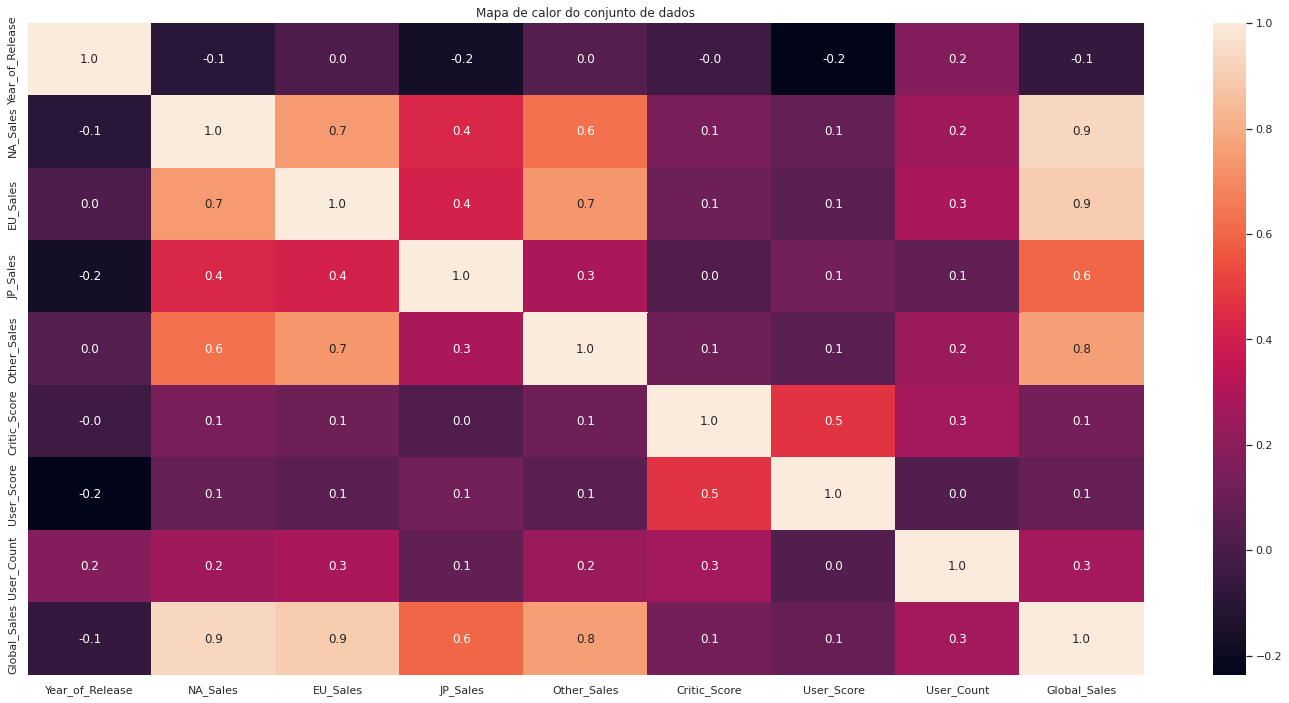

In [ ]:
cmap = sns.cubehelix_palette(reverse=True)
azul = sns.cubehelix_palette(rot=-.4)
roxo = sns.color_palette("flare", as_cmap= False)
#  CORRELAÇÕES
corr_matriz = vgsales.corr()
plt.figure(figsize=(25,12))
plt.title("Mapa de calor do conjunto de dados")
sns.heatmap(corr_matriz, annot=True, fmt = '.1f' )


Imediatamente, podemos ver como todos os valores das vendas NA, EU, JP, Outros e Global estão altamente correlacionados. A multicolinearidade das vendas globais é esperada, pois é a soma de todas as vendas da região. Também é justo esperar que um videogame que obteve altas vendas em uma região também venda bem em outra região.

Curiosamente, as vendas de JP parecem ter a correlação mais fraca em comparação com os outros mercados, possivelmente sugerindo que há menos sobreposição entre os mercados no Japão do que em outras regiões.

Da mesma forma, a pontuação da crítica e a pontuação do usuário também parecem estar fortemente correlacionadas. Como um jogo que teve uma pontuação alta entre os críticos provavelmente será visto como um bom jogo, os usuários provavelmente também terão uma pontuação alta e vice-versa.

Ano de lançamento parece ter muito pouca correlação com vendas e métricas de pontuação

## 1.3 Analise de Vendas

Aqui veremos um descritivo gráfico de frequências de cada um dos atributos do conjunto de dados

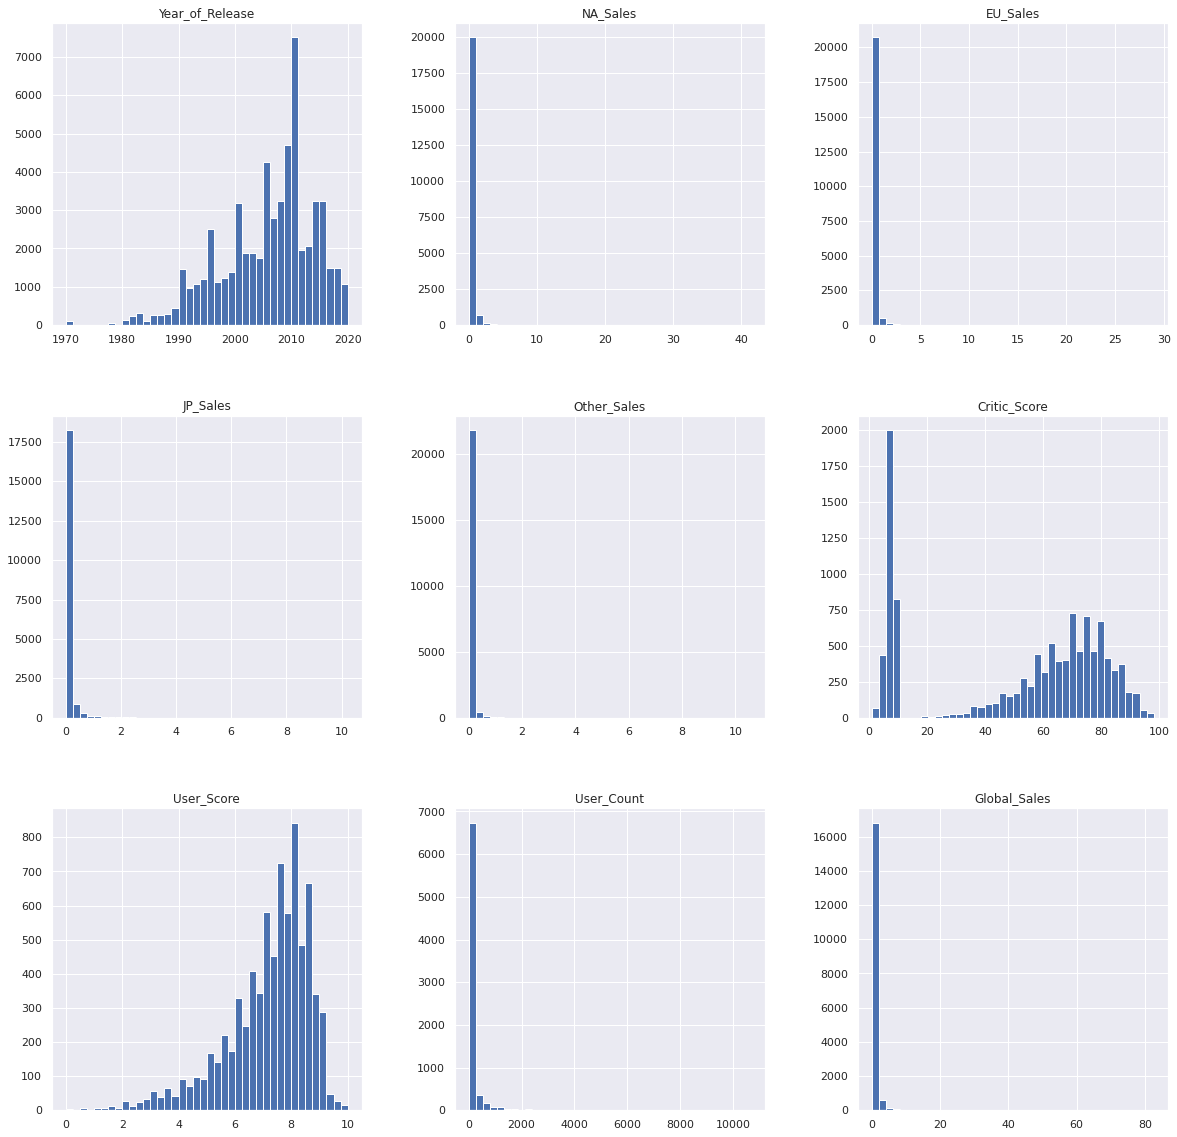

In [ ]:
%matplotlib inline 
vgsales.hist(bins=40, figsize=(20,20))
plt.show()

# ANALISE DA PONTUAÇÃO DE CRÍTICA

Aqui destaremos as plataformas mais conhecidas, portanto, mais relevantes em variáveis pra facilitar sua plotagem com matplotlib.
Observamos que muitos jogos podem não ter uma pontuação de críticos ou usuários. Optamos por ignorar esses videogames para esta exploração.

As pontuações dos críticos são classificadas de 0 a 100, enquanto as pontuações do usuário são classificadas de 0,0 a 10,0, tornando-as diretamente comparáveis.

VISUALIZAÇÃO DE DAOOS DA PONTUAÇÃO DE CRÍTICA


In [ ]:
vgsales = vgsales.fillna(np.nan)

In [ ]:
print ('Descrição \n',vgsales.Critic_Score.describe())

Descrição 
 count    11463.000000
mean        51.043802
std         30.398051
min          1.000000
25%          8.600000
50%         63.000000
75%         76.000000
max         98.000000
Name: Critic_Score, dtype: float64


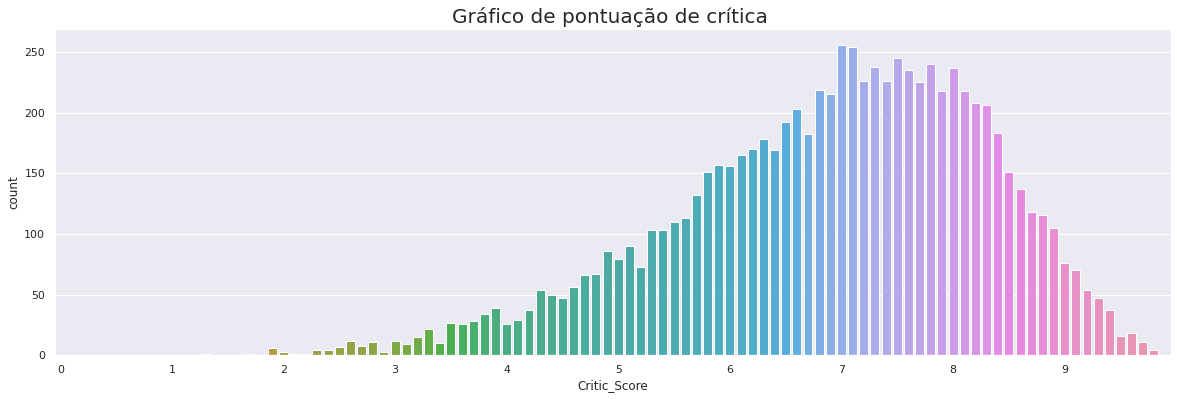

In [ ]:
plt.figure(figsize=(19,6))
plt.title("Gráfico de pontuação de crítica ", size = 20)
critic_score_count = sns.countplot(data=vgsales, x=data.Critic_Score, order = range(0,100))
critic_score_count.set_xticks(range(0,100,10))

In [ ]:
crit = vgsales[['Critic_Score']].value_counts()
freq  = vgsales[['Critic_Score']].value_counts(normalize = True)*100
dataset = pd.DataFrame( { "Frequencia": crit, "Percentual(%)": freq})
dataset.rename_axis("Pontuação da Crítica", axis = "columns",inplace= True )
dataset

Pontuação da Crítica,Frequencia,Percentual(%)
Critic_Score,,
70.0,256,2.233272
71.0,254,2.215825
75.0,245,2.137311
78.0,240,2.093693
73.0,238,2.076245
...,...,...
2.4,1,0.008724
2.2,1,0.008724
1.9,1,0.008724


VISUALIZAÇÃO DE DADOS DE CRÍTICA DE USUÁRIO

In [ ]:
vgsales.User_Score.describe()

count    7782.000000
mean        7.148047
std         1.508067
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max        10.000000
Name: User_Score, dtype: float64

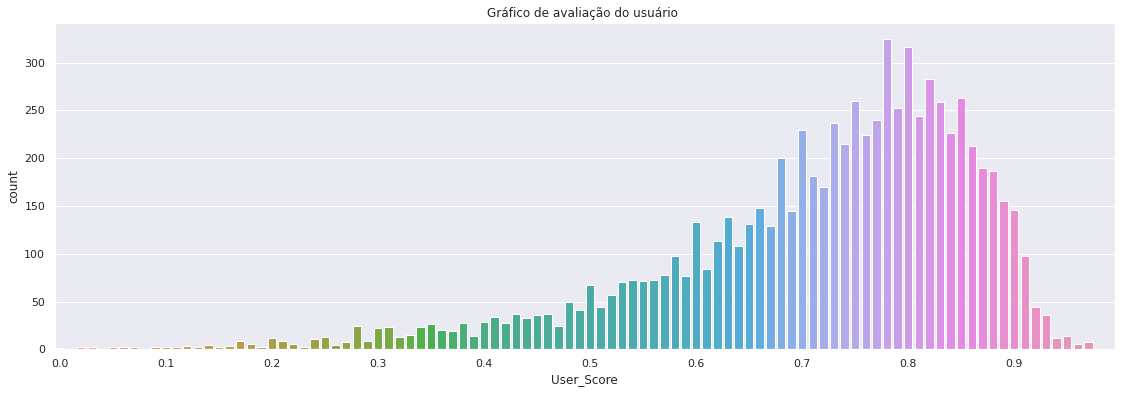

In [ ]:
plt.figure(figsize=(19,6))
plt.title("Gráfico de avaliação do usuário ")
user_score_count = sns.countplot(data=vgsales, x=vgsales.User_Score, order = [x/10 for x in range(0,100)])
user_score_count.set_xticks(range(0,100,10))

In [ ]:
crit = vgsales[['User_Score']].value_counts()
freq  = vgsales[['User_Score']].value_counts(normalize = True)*100
usuario = pd.DataFrame( { "Frequencia": crit, "Percentual(%)": freq})
usuario.rename_axis("Pontuação da Crítica de usuário", axis = "columns",inplace= True )
usuario

Pontuação da Crítica de usuário,Frequencia,Percentual(%)
User_Score,,
7.8,325,4.176304
8.0,316,4.060653
8.2,283,3.636597
8.5,263,3.379594
7.5,260,3.341043
...,...,...
1.3,2,0.025700
1.5,2,0.025700
1.9,2,0.025700


Podemos ver que a pontuação dos críticos e dos usuários tem uma inclinação negativa, com a pontuação dos usuários tendo uma inclinação negativa maior. Isso ocorre porque os usuários tendem a estar mais dispostos a dar pontuações mais baixas, pois a pontuação mínima para críticos é 13 e a mínima para usuários é 0.

Também podemos ver padrões interessantes, especialmente com pontuações de usuários, certos números são fortemente favorecidos. Inteiros como 6,0, 7,0 e 8,0 tendem a ser dados com mais frequência do que outros. Curiosamente, 7,8 é o modo de pontuação do usuário, apesar de não ser um número inteiro.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
vgsales['Critic_Score']

0        76.0
1         NaN
2        82.0
3        80.0
4         NaN
         ... 
72502     NaN
72503     NaN
72504     NaN
72505     NaN
72506     NaN
Name: Critic_Score, Length: 60124, dtype: float64

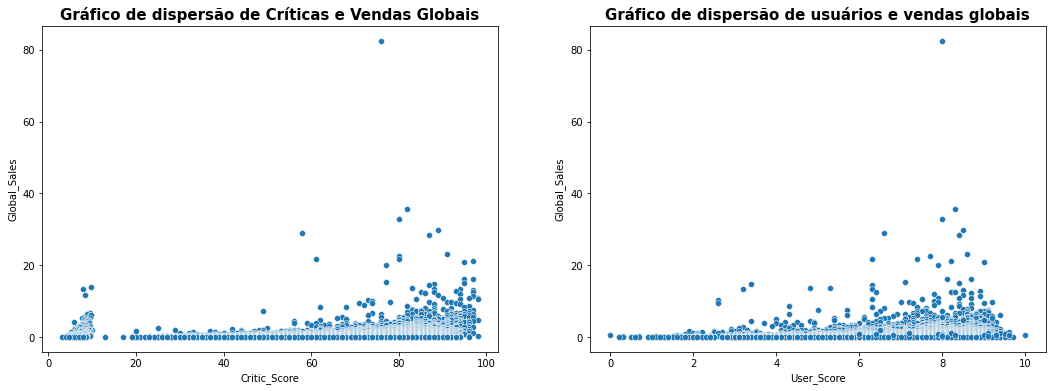

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))

ax[0].set_title("Gráfico de dispersão de Críticas e Vendas Globais", size =15, fontweight = 'bold')
sns.scatterplot(data=vgsales, x='Critic_Score', y='Global_Sales', ax=ax[0])


ax[1].set_title("Gráfico de dispersão de usuários e vendas globais", size =15, fontweight = 'bold')
sns.scatterplot(data=vgsales, x='User_Score', y='Global_Sales', ax=ax[1])


Podemos ver que, em geral, os jogos que venderam mais globalmente receberam pontuações mais altas de Críticos e Usuários. Curiosamente, as distribuições são mais inclinadas negativamente para os críticos do que para os usuários.

Podemos que temos outlier de jogos de grande faturamento com crítica por entre 7 e 8 , com isso inferimos que a qualidade do game e sua recepção pode também não condizer com sua lucratividade, tendo em vista outros fatores como : 
* Jogo mais aguardado
* Fan service 
* Nolstagia

Isso ainda vale para jogos menos populares?

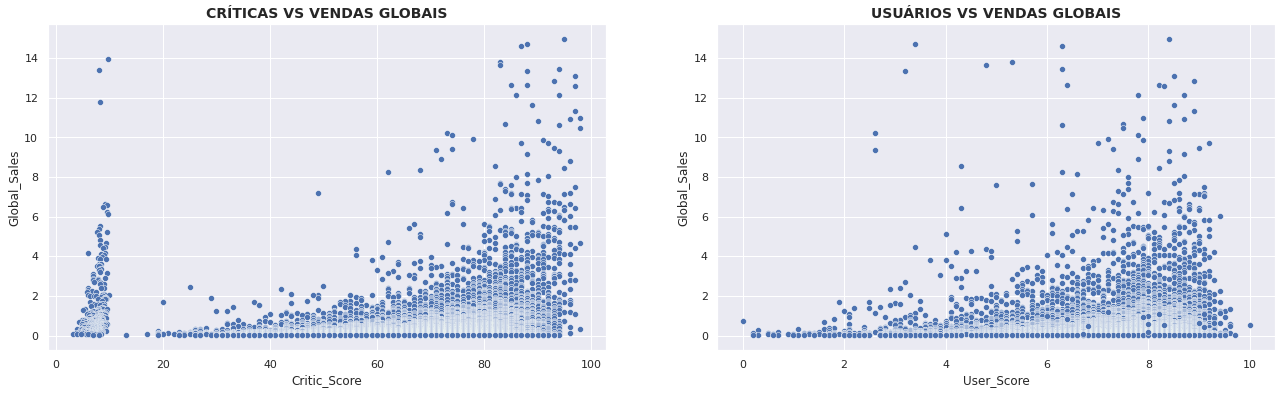

In [ ]:
# Scatter graph of Critic Score and Global Sales. Uncapped

fig, axlimited = plt.subplots(1, 2, figsize=(22,6))

axlimited[0].set_title("CRÍTICAS VS VENDAS GLOBAIS", fontweight = 'bold', size = 14)
sns.scatterplot(data=vgsales[vgsales.Global_Sales <= 15], x='Critic_Score', y='Global_Sales', ax=axlimited[0]) # VAMOS DAR UM ZOOM NOS DADOS

axlimited[1].set_title("USUÁRIOS VS VENDAS GLOBAIS", fontweight = 'bold', size = 14)
sns.scatterplot(data=vgsales[vgsales.Global_Sales <= 15], x='User_Score', y='Global_Sales', ax=axlimited[1])

SUBDIVIDINDO AS PLATAFORMA PARA UMA ANALISE INDIVIDUAL 

In [ ]:
PC ,Wii, PS3 ,PS4 = vgsales[vgsales['Platform'] == 'PC'], vgsales[vgsales['Platform'] == 'Wii'],  vgsales[vgsales['Platform'] == 'PS3'],  vgsales[vgsales['Platform'] == 'PS4']
DS ,X360, PSP ,XOne = vgsales[vgsales['Platform'] == 'DS'], vgsales[vgsales['Platform'] == 'X360'],  vgsales[vgsales['Platform'] == 'PSP'] ,  vgsales[vgsales['Platform'] == 'XOne']
PS2 ,DS_3  = vgsales[vgsales['Platform'] == 'PS2'], vgsales[vgsales['Platform'] == '3DS']


Avaliaremos os 20 melhores jogos mais bem avaliados pela crítica , no entanto, certos jogos podem ser disponíveis em mais de 1 plataforma . Logo torna-se mais fácil trabalhar filtrando a platarforma e conhecermos os 20 melhores jogos bem avaliados de acordo com sua plataforma de lançamento.
É comum os jogos serem lançados inicialmente para seus respectivos consoles e apos um período indeterminada ser anunciado lançamento para platarformas como PC. Devido a este conhecimento que achamos melhor filtrar essa análise de acordo com a plataforma

In [ ]:
cmap = sns.cubehelix_palette(reverse=True)
azul = sns.cubehelix_palette(rot=-.4)
roxo = sns.color_palette("flare", as_cmap= False)
critica = 'Critic_Score'
usuario = 'User_Score'

In [ ]:
def topgames(game,critica):
  game2 = game.set_index('Name') # AVALIANDO JOGOS DE PC
  top_games = game2[critica].sort_values(ascending=False)
  top_games = top_games[:20]
  top_games.sort_values(ascending=True, inplace=True) 
  plt.figure(figsize=(25,9))
  plt.title("Top 20 Games mais bem avaliados pela crítica", size=25, fontname="Times New Roman",fontweight="bold",)
  ay = top_games.plot.barh(x= critica, y='Name', color = cmap)
  plt.xlabel(critica, size=20)
  plt.ylabel("Título", size=20)
  ay.set(xlim=(8, 10))
  if critica == 'Critic_Score':
    ay.xaxis.set_ticks(np.arange(0, 110, 25))
  else:
    ay.xaxis.set_ticks(np.arange(0, 12, 2.5))

  for tick in ay.xaxis.get_major_ticks():
      tick.label.set_fontsize(18)
  for tick in ay.yaxis.get_major_ticks():
      tick.label.set_fontsize(18)
      
  for i, v in enumerate(top_games):
      ay.text(v+.05, i-.15, str(v)[:4], fontsize=16)

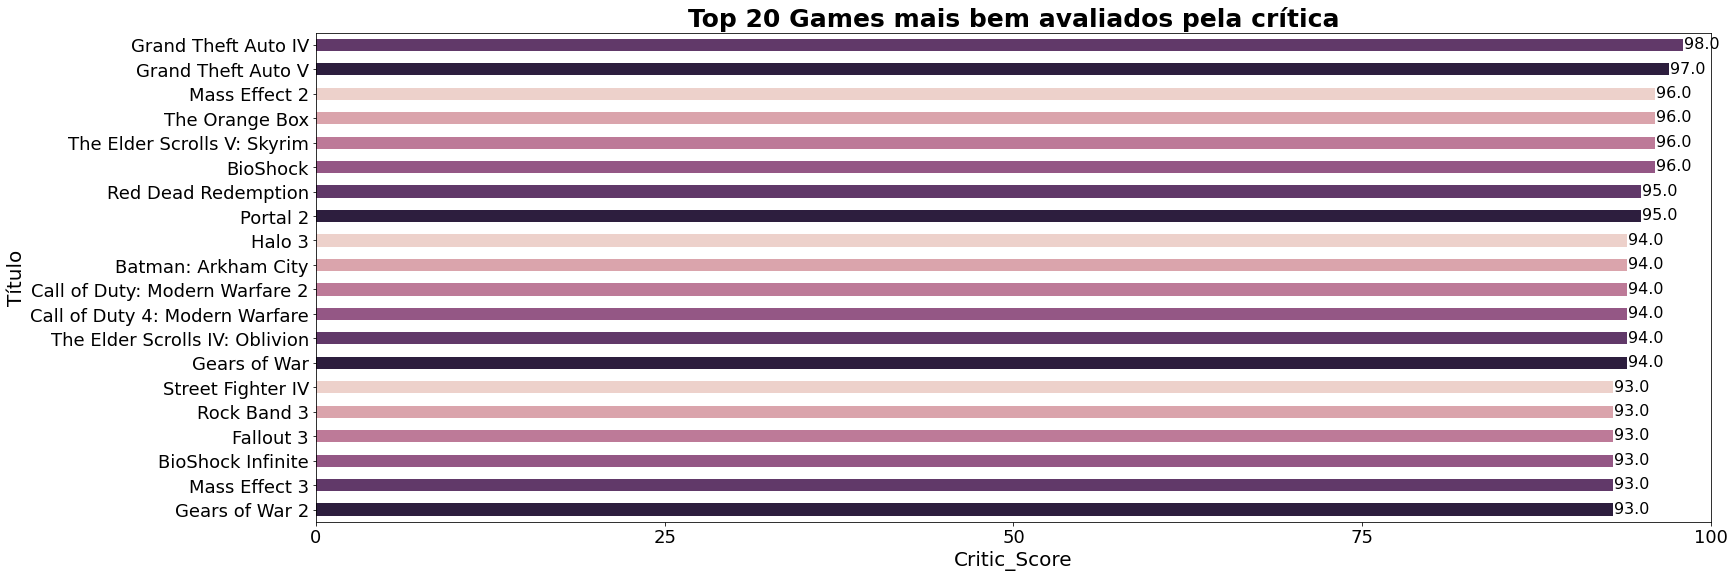

In [ ]:
topgames(X360,critica)

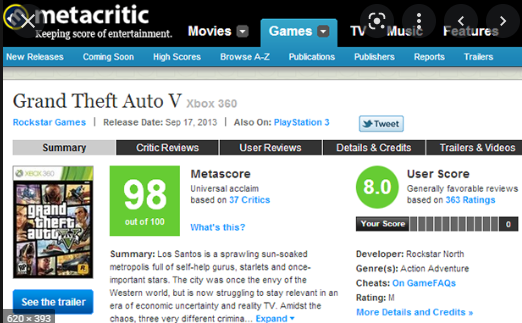

Grand Theft Auto V foi um dos jogos mais bem avaliados pela crítica , lançado em 2013 e ainda até hoje consta como uns dos melhores jogos ja feito pela Rockstar pela empresa Take-Two- Interact . Seu sucesso foi tão global que atualmente hoje é liberado para todas as plataformas desde da geração do PS3 e Xbox360.

Premiações ganhadas :

* VGX - Melhor Trilha Sonora (2013)
* BAFTA  Video Game Award - Melhor Multiplayer(2014)
* VGX - Melhor Jogo do ano (2013)
* BAFTA Video Game Award- Melhor Design (2013)
* BAFTA Video Game Award- Jogo Britânico (2013)
* VGX -Jogo mais aguardado (2013)
* The Game Award para melhor masterização (2014)

Além de uma analise de melhor avaliação pela crítica, achamos válido também uma uma análise do melhor valor da faturamento por plataforma.

In [ ]:
def topfaturamento(game,critica):
  game2 = game.set_index('Name') # AVALIANDO JOGOS DE PC
  top_games = game2[critica].sort_values(ascending=False)
  top_games = top_games[:20]
  top_games.sort_values(ascending=True, inplace=True) 
  
  plt.figure(figsize=(20,8))
  plt.title("Top 20 Games mais bem lucrativos do mercado", size=25, fontname="Times New Roman",fontweight="bold",)
  ay = top_games.plot.barh(x=critica, y='Name', color = cmap)
  plt.xlabel("Vendas Globais", size=20)
  plt.ylabel("Título", size=20)
  ay.set(xlim=(8, 10))
  if critica == 'Critic_Score':
    ay.xaxis.set_ticks(np.arange(0, 120, 25))
  else:
    ay.xaxis.set_ticks(np.arange(0, 12, 2.5))

  for tick in ay.xaxis.get_major_ticks():
      tick.label.set_fontsize(18)
  for tick in ay.yaxis.get_major_ticks():
      tick.label.set_fontsize(18)
      
  for i, v in enumerate(top_games):
      ay.text(v+.05, i-.15, str(v)[:4], fontsize=16)

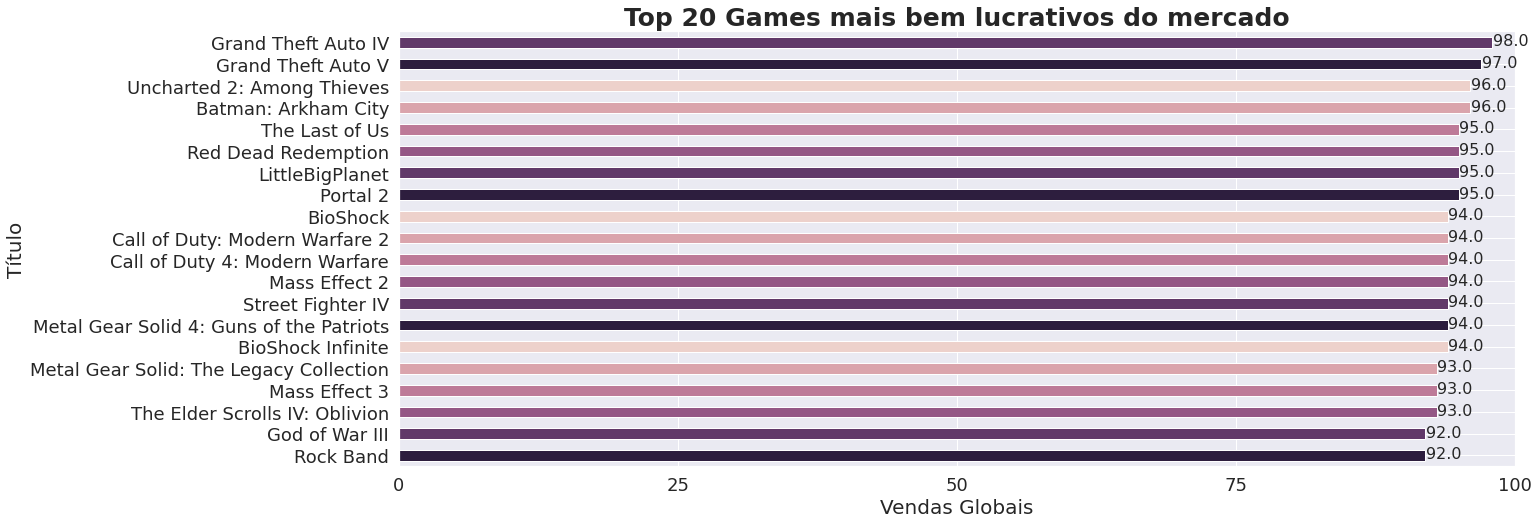

In [ ]:
topfaturamento(PS3,critica)

In [ ]:
vgsales.query('Name == "Grand Theft Auto V" ') # GTA V É UM MODELO DE JOGO LUCRATIVO E BEM AVALIADO 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,User_Count,Developer,Rating,Global_Sales
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,97.0,8.2,3994.0,Rockstar North,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,97.0,8.1,3711.0,Rockstar North,M,16.27
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,97.0,8.3,2899.0,Rockstar North,M,12.62
165,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.81,2.19,0.00,0.47,97.0,7.9,764.0,Rockstar North,M,5.47
1730,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.39,0.69,0.00,0.09,96.0,7.9,3756.0,Rockstar North,M,1.17


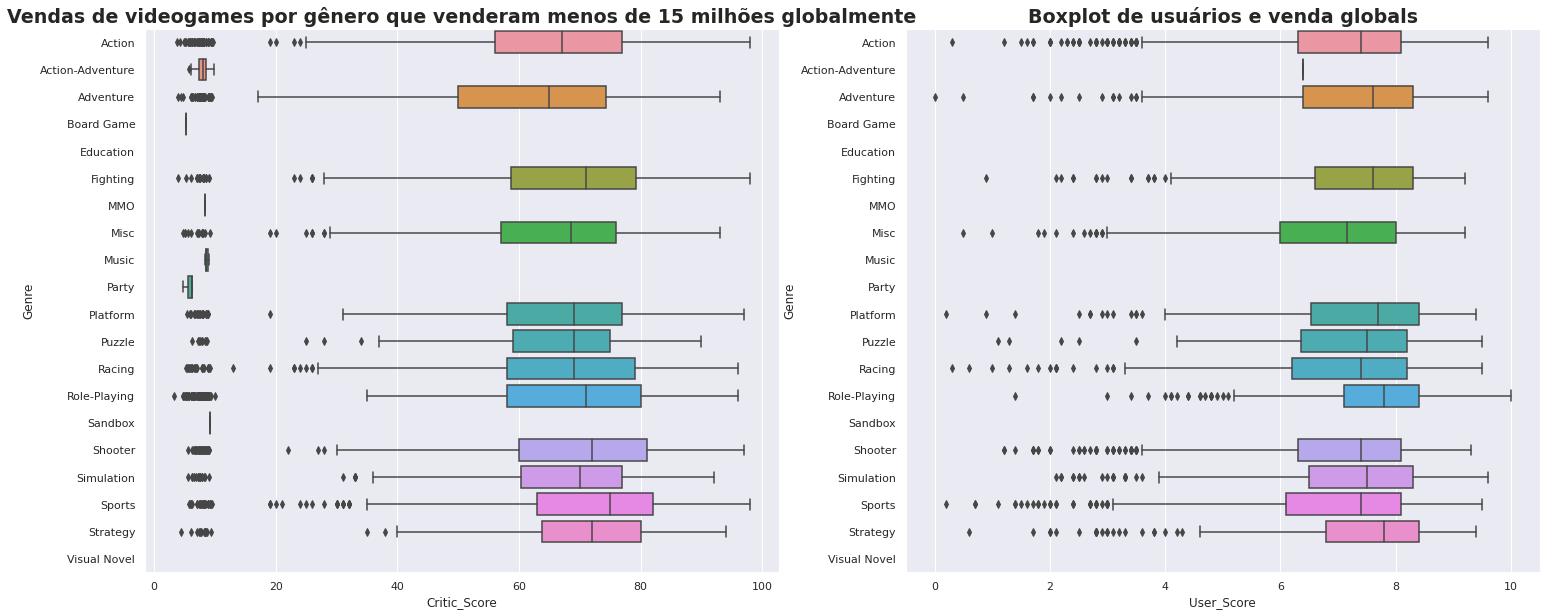

In [ ]:
# GRÁFICO DE DISPERSÃO COMPARANDO AS DUAS CRÍTICAS E AQUI VERIFICAMOS AMBAS CRÍTICAS SE ASEMELHAM PARA VALORES 

fig, axes = plt.subplots(1, 2, figsize=(25,10))

sns.boxplot(data=vgsales[vgsales.Global_Sales <= 15], y= 'Genre', x= 'Critic_Score', order=sorted(vgsales.Genre.dropna().unique()), ax=axes[0])
axes[0].set_title("Vendas de videogames por gênero que venderam menos de 15 milhões globalmente",fontname="Arial Black",fontweight="bold", size=19)

axes[1].set_title("Boxplot de usuários e venda globals",fontname="Arial Black",fontweight="bold", size=19)
sns.boxplot(data=vgsales[vgsales.Global_Sales <= 15], y='Genre', x='User_Score', order=sorted(vgsales.Genre.dropna().unique()), ax=axes[1])

Existem algumas tendências gerais que podemos ver tanto nas pontuações dos críticos quanto nas pontuações dos usuários.

Jogos de aventura tendem a receber pontuações piores para os críticos, mas acima da média para os usuários.

Os RPGs tendem a obter pontuações altas de ambos os públicos (e um spread menor notável no IQR).

Os esportes tendem a obter pontuações de usuários um pouco mais baixas, mas ficam acima da média para os críticos.

Com isso, vemos que de fato alguns gêneros são mais ou menos favorecidos para certo público de crítica, no entanto, a mediana de ambos são bastantes semelhantes

# ANALISE DE GÊNEROS ?

Surge agora o interesse em saber nao momento a venda pelos jogos ou plataforma responsável pelo lançamento, mas podemos inferir gráficamente qual gênero de mais compra ( demandado) pelo público alvo )

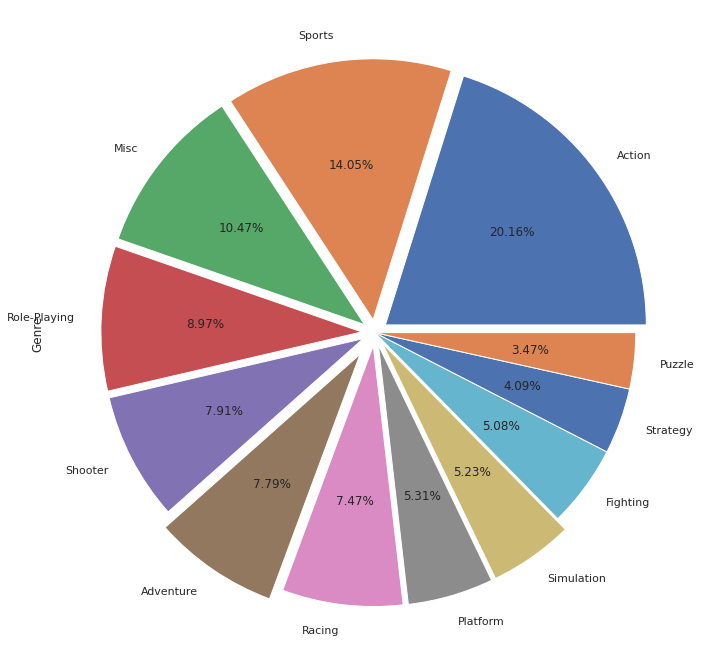

In [ ]:
data.Genre.value_counts().plot.pie(autopct = "%0.2f%%", explode = [0.05,0.05,0.05,0.05,0.05,0.1,0.05,0.05,0.05,0,0,0])

Os videogames neste banco de dados são divididos em 12 gêneros diferentes. Essas caracterizações gerais de cada gênero são explicadas abaixo:

* Ação - Desafios baseados em precisão e reação.
* Aventura - Exploração e uma narrativa guiada pela história. Os quebra-cabeças também costumam ser incorporados.
* Fighting - Combate entre normalmente dois jogadores onde são frequentemente necessárias entradas técnicas únicas.
* Plataforma - O movimento, como pular e escalar, é usado para atravessar um ambiente.
* Puzzle - Resolução de problemas e vários desafios lógicos. Muitas vezes incorporado em outros gêneros.
* Corrida - Conduzindo algum meio de transporte contra outros ou contra o tempo
* Role-playing - Sistemas baseados em progressão onde um personagem do jogador se torna mais forte, muitas vezes através de uma história.
* Shooter - Armamento de longo alcance, mais comumente armas, em combate para causar dano aos oponentes. Os oponentes podem ser outros jogadores ou oponentes controlados pela IA.
* Simulação - Sistemas que visam simular a realidade (real ou fictícia).
* Esportes - Recriações de esportes, mas em um videogame.
* Estratégia - Jogabilidade baseada em planejamento habilidoso e cuidadoso para atingir um objetivo.
* Misc - Qualquer jogo que não se enquadre em nenhuma das categorias acima. Notavelmente, jogos de música e jogos de festa se enquadram nesta categoria

In [ ]:
def autolabels(grupo) : # AQUI DEFINIMOS UMA FUNÇÃO PARA COLOCAR RÓTULOS NOS VALORES
  for i in grupo :
    h = i.get_height()
    ax.annotate('{} Mi'.format(h), 
                xy =(i.get_x()+i.get_width()/2,h),
                xytext = (0,8),
                textcoords = 'offset points' , 
                ha ='center', size = 14,
                fontweight="bold" 
                  )
# ESTA CÉLULA TEM COMO INTUITO CRIAR O DATASET RESPONSÁVEL POR VENDAS GLOBAIS AGRUPADOS POR GÊNERO E ORGANIZA-LOS DE FORMA DESCRESCENTE. 
gblSaleByGenreAll = vgsales[["Genre","Global_Sales"]].groupby(["Genre"]).sum().reset_index()
gblSaleByGenreAll = gblSaleByGenreAll.sort_values(by=["Global_Sales",'Genre'], ascending=False)

# CRIANDO TABELAS DE MÉDIAS DE CRÍTICA POR GENERO
Criticas = vgsales[["Genre","Critic_Score"]].groupby(["Genre"]).mean().reset_index()
User = vgsales[["Genre","User_Score"]].groupby(["Genre"]).mean().reset_index()
vendas_globais = list(gblSaleByGenreAll['Global_Sales'])
labels = list(gblSaleByGenreAll['Genre']) 

criticbygenre = pd.merge(Criticas,User, on = ['Genre'], how = 'inner')
criticbygenre.sort_values(by=['Critic_Score','User_Score','Genre'], ascending = False)

,Genre,Critic_Score,User_Score
17,Sports,61.618041,6.967329
0,Action,56.231600,7.064943
12,Racing,55.293803,7.043653
7,Misc,54.017345,6.823198
16,Simulation,53.429979,7.145559
5,Fighting,53.294555,7.313184
15,Shooter,51.610082,7.039597
10,Platform,46.158226,7.340757
18,Strategy,44.705736,7.305660
13,Role-Playing,44.466692,7.651088


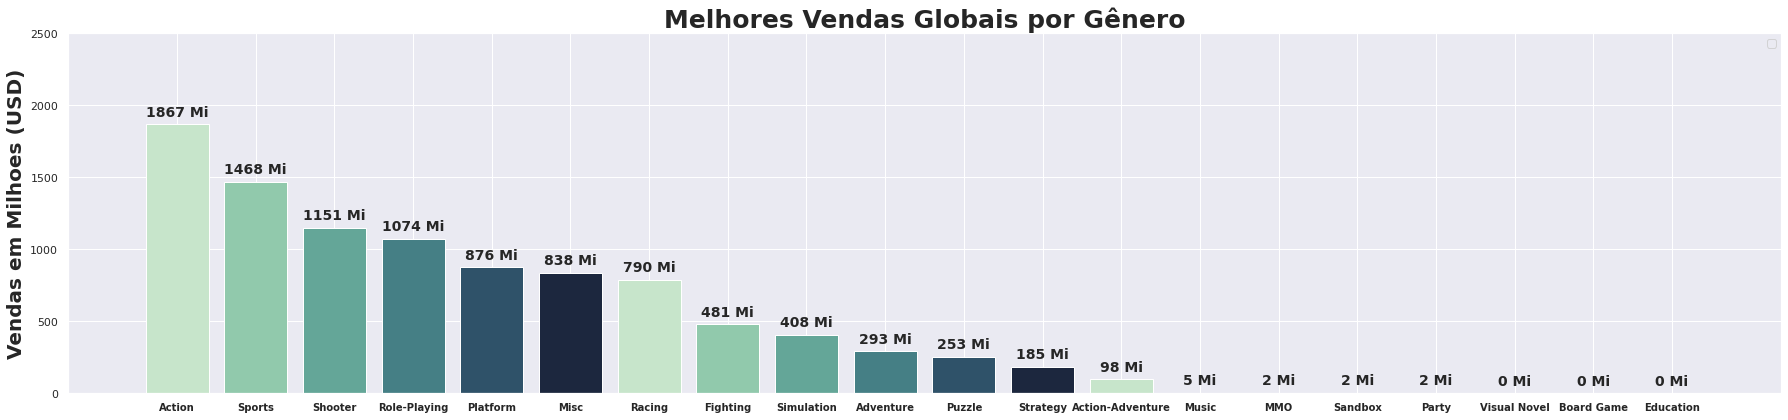

<Figure size 1080x432 with 0 Axes>

In [ ]:
# ARRENDONDAR OS VALORES PARA FACILITAR VISUALIZAÇÃO DO GRÁFICO 
a = 0
for i in vendas_globais :  
  vendas_globais[a] = round(vendas_globais[a])
  a +=1
# POR FIM, COM ESCOPO DE AVALIARMOS GRÁFICAMENTOS,USAMOS A INTESIDADE DE COR PARA MÉTRICA DE MAIOR VALOR DE VENDA DE FORMA DESCRESCENTE
x = np.arange(len(labels))
fig, ax = plt.subplots(1, figsize=(25,6))
width = 0.8
rects1 = ax.bar(x , vendas_globais, width, color = azul )
ax.set_xticks(x)
ax.set_xticklabels(labels,fontweight="bold",size = 10)
ax.set_ylim([0,2500])
plt.ylabel('Vendas em Milhoes (USD)',fontweight="bold",size = 20)
ax.legend()
ax.set_title("Melhores Vendas Globais por Gênero",fontname="Times New Roman",fontweight="bold", size=25)
autolabels(rects1)
fig.tight_layout()
plt.grid(True)
plt.show()

#GRAFICO DE PIZZA 
fig1 = px.pie(values=gblSaleByGenreAll["Global_Sales"], names=gblSaleByGenreAll["Genre"])
fig1.update_traces(sort=False, title = "% of Global Game Sales by Genre") 
plt.figure(figsize = (15,6))
fig1.show()


Assim conseguimos ver que Ação e Esportes são os dois gêneros mais vendido dentre um período de 30 anos e jogos de Estratégia e Quebra cabeças são os 2 gêneros menos vendidos.

Outra maneira de verificar esse valores é através um mapa de correlação onde podemos subdividir as vendas por região agrupados por Gênero. 
O escopo desse mapa de correlação é entendermos qual região tem maior impacto no número de vendas em cada gênero mais requisitado.


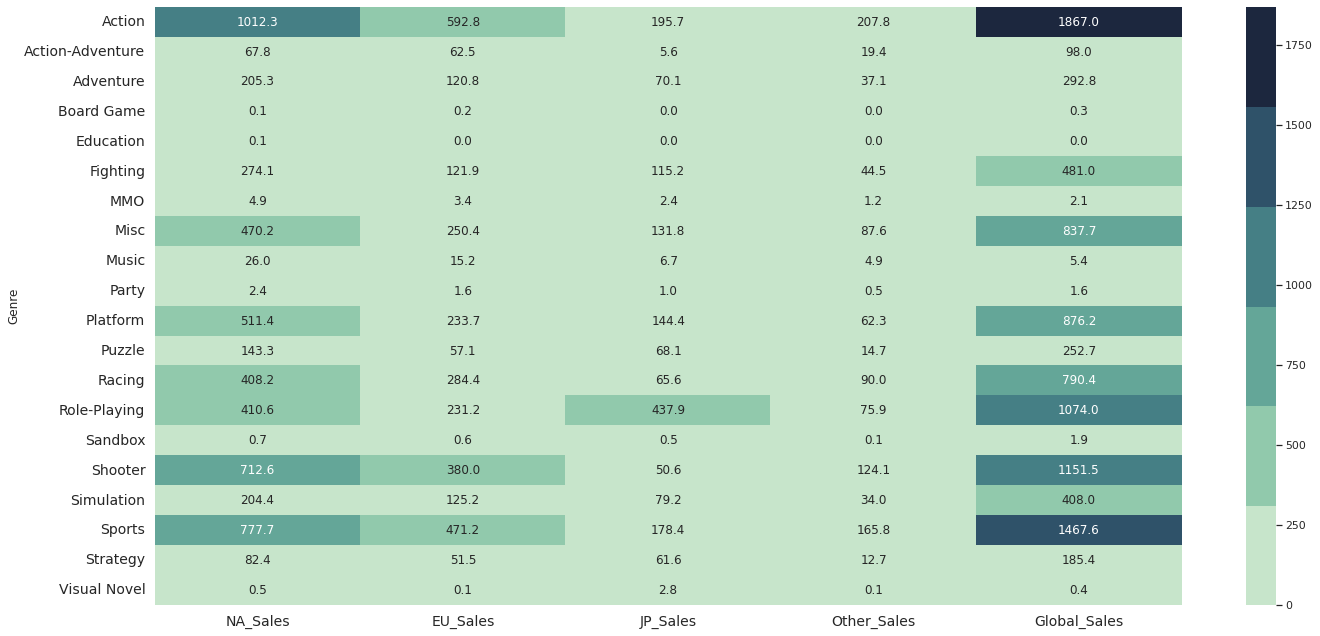

In [ ]:
comp_genre = vgsales[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map
plt.figure(figsize=(23, 11))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f', cmap = azul )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
#PERFIL DE USUÁRIO , COMPRA. VENDA E INTERESSE POR REGIÃO

# ANALISE DE PLATAFORMA DO CONJUNTO DE DADOS


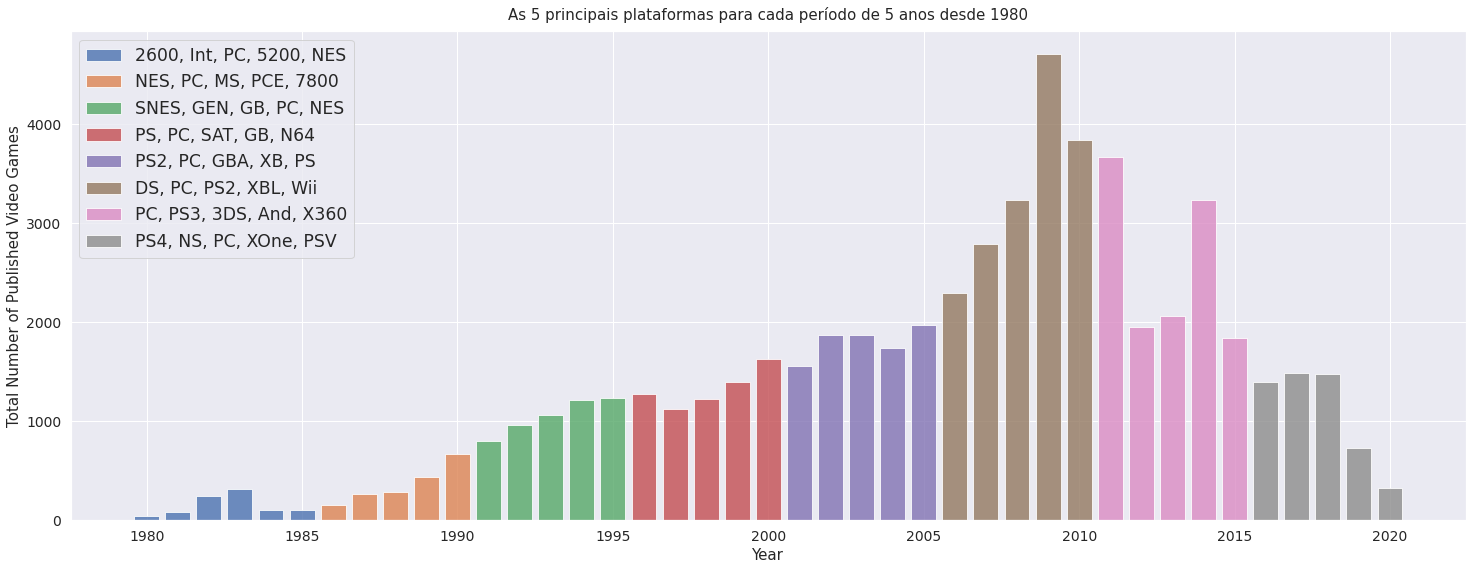

In [ ]:
# What are the top 5 platforms for each 5 year time period beginning from 1980 to 2016?

year_sales = vgsales['Year_of_Release'].value_counts()
year_sales = year_sales.sort_index()
# function to get the modal platforms in a given year range
def get_modal_platform(year_range):
    year_range_record = vgsales[vgsales.Year_of_Release.isin(year_range)]
    return year_range_record['Platform'].value_counts().index[:5]

fig, ax = plt.subplots(figsize=(25, 9))
start, end = 1980, 1985
for i in range(10):
    modal_platform = ', '.join(get_modal_platform(range(start, end)))
    bar = ax.bar(year_sales.loc[start:end].index,
           year_sales.loc[start:end].values, 
           label=modal_platform, alpha=0.8)
    start = end + 1
    end = end + 5
      
ax.set_title('As 5 principais plataformas para cada período de 5 anos desde 1980', fontsize=15, y=1.01)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Total Number of Published Video Games', fontsize=15)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

ax.legend(fontsize='x-large')
plt.show()

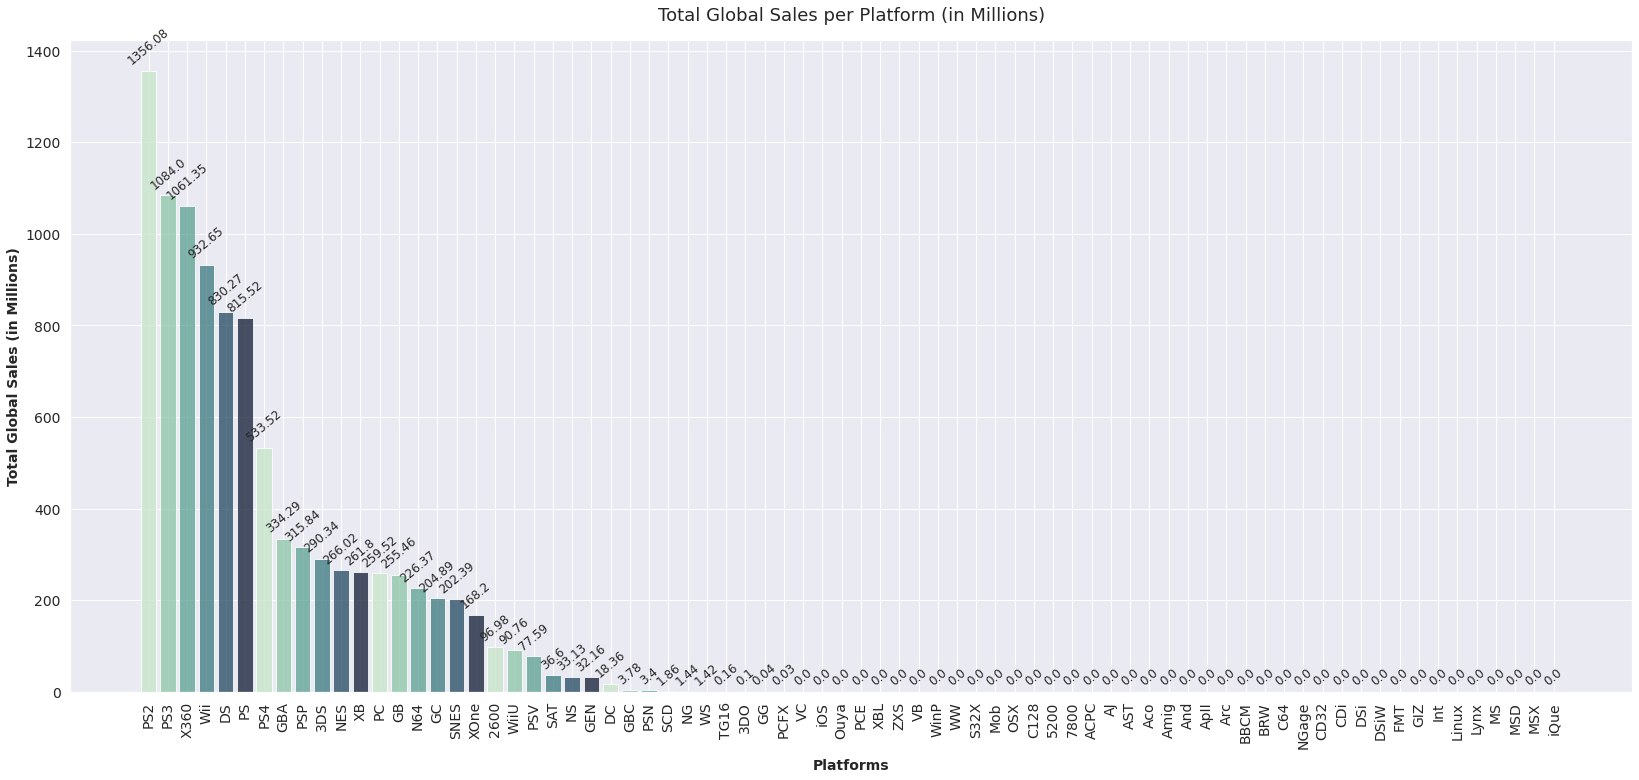

In [ ]:
fig, ax = plt.subplots(figsize=(28, 12))
def add_bar_label(ax, s, yincr=0, xincr=0, isbarh=False, **kwargs):
    if isbarh:
        for i in s.index:
             ax.text(s.loc[i]+xincr, i, round(s.loc[i], 2), 
                     ha='center', **kwargs)
    else:
        for i in s.index:
            ax.text(i, s.loc[i]+yincr, round(s.loc[i], 2), 
                    ha='center', **kwargs)

# Compute for total vg global sales for each platform
platform_global_sales = vgsales.groupby('Platform')['Global_Sales']
platform_global_sales = platform_global_sales.sum().sort_values(ascending=False)
ax.bar(platform_global_sales.index, platform_global_sales.values, color=azul, alpha=0.8)
ax.set_title('Total Global Sales per Platform (in Millions)', fontsize=18, y=1.02)
ax.set_xlabel('Platforms', fontsize=14, labelpad=10, fontweight ='bold')
ax.set_ylabel('Total Global Sales (in Millions)', fontsize=14, fontweight = 'bold')
ax.tick_params(axis='x', labelsize=14, rotation=90)
ax.tick_params(axis='y', labelsize=14)
add_bar_label(ax, platform_global_sales, 15, fontsize='medium', rotation=40)
fig.subplots_adjust(hspace=0.30)
plt.show()

Interpretação:

O gráfico acima mostra o total de vendas globais de videogames físicos por plataforma.

Por exemplo, podemos ver que o PS2 tem as vendas mais altas porque 1,256 bilhão de unidades de jogos são vendidas para este console desde seu lançamento em 2000.

Ao lado do PS2 estão X360 e PS3 com 971,63 milhões e 939,43 milhões de unidades de jogos vendidas para esses consoles respectivamente

# ANALISE INDIVIDUAL DE JOGOS

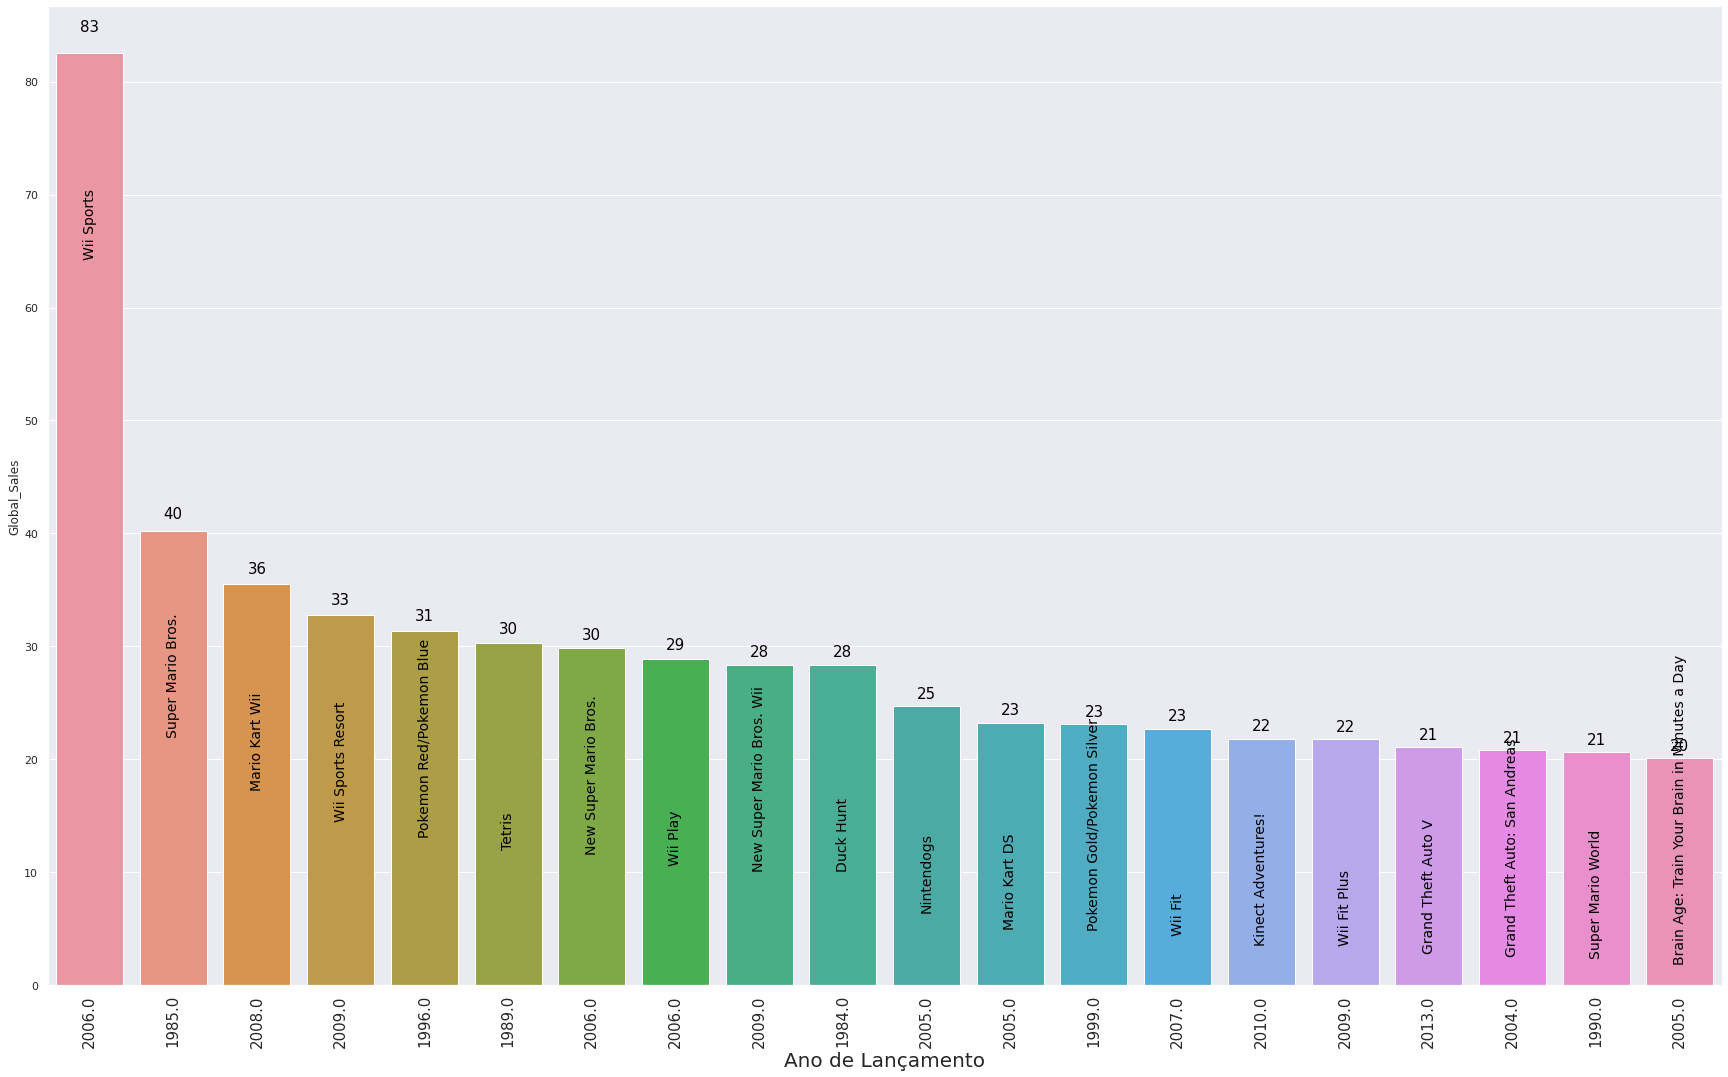

In [ ]:
# FILTRANDOS AS COLUNAS DE INTERESSE

top_game_sale = vgsales.head(20)
top_game_sale = top_game_sale[['Name', 'Year_of_Release', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)


name = top_game_sale['Name']
year = top_game_sale['Year_of_Release']
y = np.arange(0, 20)
# PLOTANDOS OS VALORES
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for i in g.patches:
  g.annotate(round(i.get_height()),
                (i.get_x()+ i.get_width()/ 2 ,1.02*i.get_height()),
                ha ='center', va ='baseline', fontsize =15 ,
                color = 'black', xytext=(0,3),
                textcoords ='offset points'
                )
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year_of_Release'], fontsize= 15, rotation=90)
plt.xlabel('Ano de Lançamento',fontsize = 20)
plt.show()

In [ ]:
vgsales.query('Name == "Wii Sports" ') # GTA V É UM MODELO DE JOGO LUCRATIVO E BEM AVALIADO 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,8.0,322.0,Nintendo,E,82.54
1,Wii Sports,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,NaN,40.24
2,Wii Sports,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.0,8.0,192.0,Nintendo,E,32.77
4,Wii Sports,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72502,Wii Sports,PC,2019.0,Role-Playing,505 Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lab Zero Games,NaN,NaN
72503,Wii Sports,PC,2019.0,Adventure,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mooneye Studios,RP,NaN
72504,Wii Sports,PS4,2019.0,Adventure,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mooneye Studios,RP,NaN
72505,Wii Sports,XOne,2019.0,Adventure,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mooneye Studios,RP,NaN


In [ ]:
# FILTRANDO VALORES DA NINTENDO
ninPub = vgsales[vgsales["Publisher"] == "Nintendo"] 

# CRIANDO TABELA 
gblSaleByGenreNin = ninPub[["Genre","Global_Sales"]].groupby(["Genre"]).sum().reset_index()
gblSaleByGenreNin.sort_values(by="Genre", ascending=False)
print ( "TABELA \n", gblSaleByGenreNin )
print("\n")

#PLOTANDO PIZZA DAS VENDAS GLOBAIS AGRUPADOS POR GÊNERO
fig2 = px.pie(values=gblSaleByGenreNin["Global_Sales"], names=gblSaleByGenreNin["Genre"])
fig2.update_traces(sort=False,title = "% of Nintendo Published Game Sales by Genre") 
fig2.show()

TABELA 
                Genre  Global_Sales
0             Action        130.86
1   Action-Adventure          2.44
2          Adventure         42.43
3          Education          0.00
4           Fighting         53.53
5               Misc        185.15
6              Music          0.00
7              Party          1.61
8           Platform        431.01
9             Puzzle        128.52
10            Racing        152.47
11      Role-Playing        308.46
12           Shooter         69.88
13        Simulation         87.53
14            Sports        219.65
15          Strategy         30.05




Jogos de Wii Nintendo é o que se caracteriza de maior preço de venda globalmente

# ANALISE DE REGIÃO 

In [ ]:
top_sale_reg = vgsales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,5316.59
1,EU_Sales,3004.21
2,JP_Sales,1617.64
3,Other_Sales,983.00


### Vendas e popularidade por Região e Gênero

([<matplotlib.patches.Wedge at 0x7fcf2c5a1d10>,
 [Text(-1.1989688126573843, 0.049737171963656505, 'NA_Sales'),
  Text(0.8097951854505154, -0.8165364398611771, 'EU_Sales'),
  Text(0.9949724181825231, 0.5963471196006755, 'JP_Sales'),
  Text(0.3208619884844171, 1.104331283784819, 'Other_Sales')],
 [Text(-0.6993984740501408, 0.029013350312132962, '48.7%'),
  Text(0.45771032221116087, -0.4615205964432739, '27.5%'),
  Text(0.5661049965521251, 0.339300947359005, '14.8%'),
  Text(0.18135677609988793, 0.6241872473566366, '9.0%')])

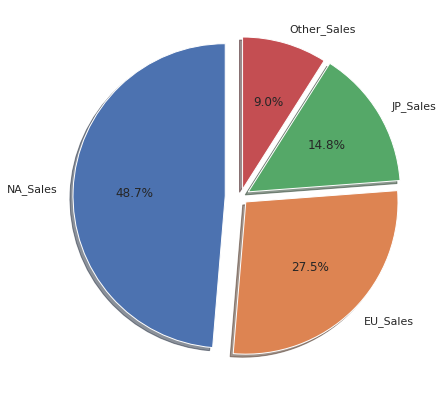

In [ ]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']


plt.figure(figsize=(25, 7))
explode = [0.1, 0.05 , 0.06, 0.05 ]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode =explode , shadow=True, startangle=90)

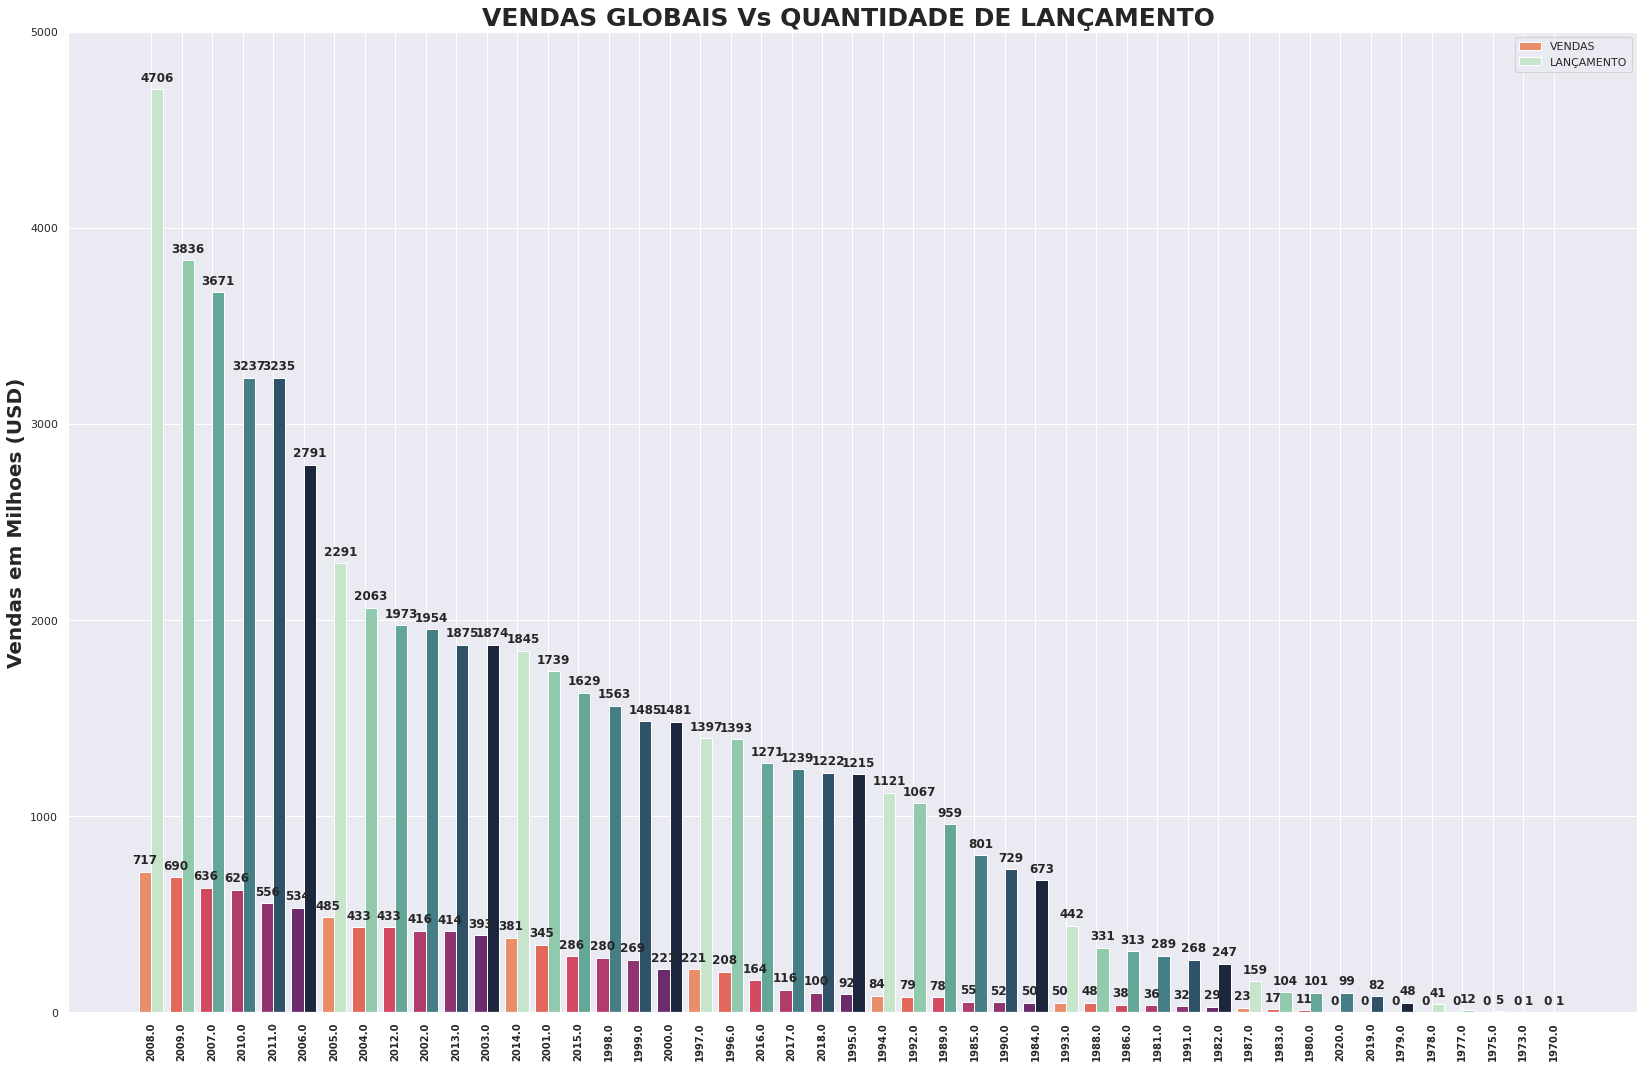

In [ ]:
def labels(grupo) : # AQUI DEFINIMOS UMA FUNÇÃO PARA COLOCAR RÓTULOS NOS VALORES
  for i in grupo :
    h = i.get_height()
    ax.annotate('{}'.format(h), 
                xy =(i.get_x()+i.get_width()/2,h),
                xytext = (0,8),
                textcoords = 'offset points' , 
                ha ='center', size =12,
                fontweight="bold" 
                  )
#FILTRANDO A TABELA ORIGINAL PARA AS COLUNAS DE INTERESSE
globalsalesperyear = vgsales[["Year_of_Release","Global_Sales"]].groupby(["Year_of_Release"]).sum().reset_index()
globalsalesperyear = globalsalesperyear.sort_values(by=["Global_Sales",'Year_of_Release'], ascending=False)
anos = list(globalsalesperyear['Year_of_Release'])
vendas = list(globalsalesperyear['Global_Sales'])
x_anos = np.arange(len(anos))
colors = ['darkviolet','blue','mediumblue','mediumturquoise','turquoise','aqua','cyan','aqua','cyan','cyan','cyan','cyan']
#FILTRANDO A TABELA ORIGINAL PARA AS COLUNAS DE INTERESSE
count_year = vgsales[["Year_of_Release","Name"]].groupby(["Year_of_Release"]).count().reset_index()
count_year = count_year.sort_values(by=["Name",'Year_of_Release'], ascending=False)
release = list(count_year['Name'])
release_year = list(count_year['Year_of_Release'])


# ARRENDONDAR OS VALORES PARA FACILITAR VISUALIZAÇÃO DO GRÁFICO 
a = 0
for i in vendas :  
  vendas[a] = round(vendas[a])
  a +=1
 # PLOTAGEM DO GRÁFICO , SETANDO INFORMAÇÕES RELEVANTES
fig, ax = plt.subplots(figsize=(23,15))
width = 0.4
paint = ['salmon']
bar1 = ax.bar(x_anos- width/2, vendas, width, color = roxo, label = 'VENDAS')
bar2 = ax.bar(x_anos +width/2, release, width, color = azul,label = 'LANÇAMENTO')
ax.set_xticks(x_anos)
ax.set_xticklabels(anos,fontweight="bold",size = 10)
ax.set_ylim([0,5000])
plt.ylabel('Vendas em Milhoes (USD)',fontweight="bold",size = 20)
plt.xticks(rotation=90)
ax.legend()
ax.set_title("VENDAS GLOBAIS Vs QUANTIDADE DE LANÇAMENTO ",fontname="Times New Roman",fontweight="bold", size=25)
labels(bar1)
labels(bar2)

fig.tight_layout()

plt.show()

Notamos que nos anos de 2008 e 2009 foram os anos de maior valor faturado para o se tratando do ano de lançamentos dos jogos. Dessa forma, entendemos que em relação ao mercado, esse período foi o mais 'aquecido' do entretenimento de jogos, entretanto os dados podem estar invesados devido a quantidade de lançamentos por ano, verificamos agora essa proposta: 

No segundo gráfico ja conseguimos justificar porque os anos de 2008 e  2009 tem maiores vendas globais. Conforme elucidado acima, tais anos mencionados foram os anos de maior número de lançamento e por consequência tende ter maiores valores de venda. Podemos ter uma relacionamento de Valor faturado no ano pela quantidade de lançamento pra sabermos em termos estatísticos, qual foi o melhor ano.

In [ ]:
TABLE = pd.merge(count_year,globalsalesperyear,on=['Year_of_Release'], how = 'inner')
TABLE = TABLE.rename(columns = {"Name":"Quantidade"})
TABLE['EFICIÊNCIA'] = (TABLE['Global_Sales']/ TABLE['Quantidade'])
TABLE.head(10)

,Year_of_Release,Quantidade,Global_Sales,EFICIÊNCIA
0,2009.0,4706,689.57,0.146530
1,2010.0,3836,626.07,0.163209
2,2011.0,3671,555.54,0.151332
3,2014.0,3237,381.38,0.117819
4,2008.0,3235,717.20,0.221700
5,2007.0,2791,636.29,0.227979
6,2006.0,2291,534.01,0.233090
7,2013.0,2063,413.74,0.200553
8,2005.0,1973,485.03,0.245834
9,2012.0,1954,432.86,0.221525


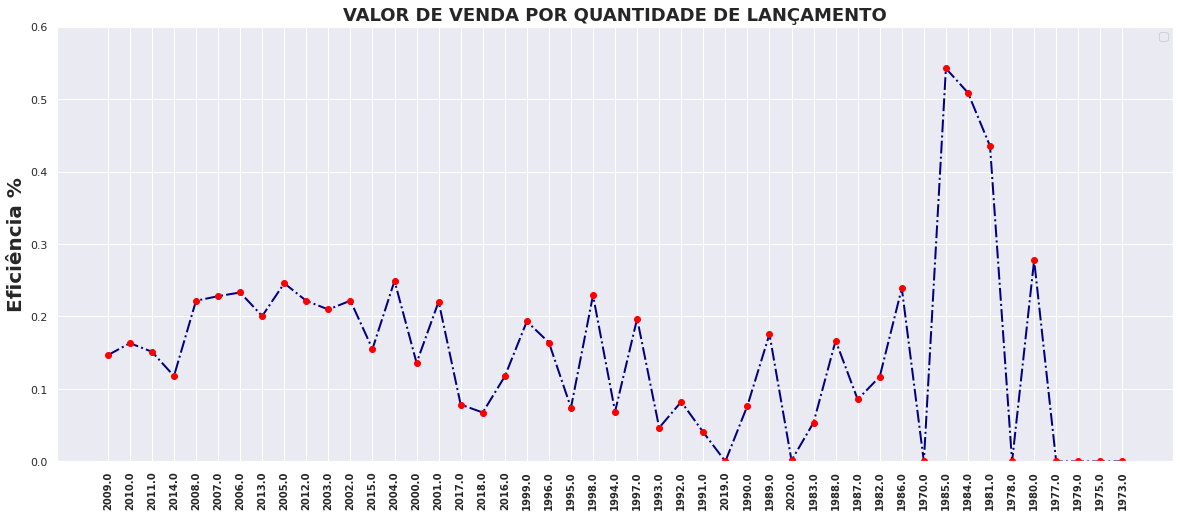

In [ ]:
eficiencia = list(TABLE['EFICIÊNCIA'])
released = list(TABLE['Year_of_Release'])
glsales = list(TABLE['Global_Sales'])
# ARRENDONDAR OS VALORES PARA FACILITAR VISUALIZAÇÃO DO GRÁFICO 
a = 0
for i in glsales :
  glsales[a] = round(glsales[a])
  a +=1
  #PLOTANDO OS VALORES
fig, ax = plt.subplots(figsize=(20,8))
released_anos = np.arange(len(released))
line = ax.plot(released_anos,eficiencia, 
               color = 'navy',
               linewidth = 2,
               linestyle = 'dashdot',
               marker = 'o',
               markersize = 6 ,
               mfc ='red',
               mec ='red'
               )

ax.set_xticks(released_anos)
ax.set_xticklabels(released,fontweight="bold",size = 10)
ax.set_ylim([0,0.6])
plt.ylabel('Eficiência %',fontweight="bold",size = 20)
plt.xticks(rotation=90)
ax.legend()
ax.set_title("VALOR DE VENDA POR QUANTIDADE DE LANÇAMENTO",fontname="Times New Roman",fontweight="bold", size=18)
#for (i ,valor) in enumerate(eficiencia, start = 0):
  #plt.text(x=released_anos[i],
           #y = valor + 3,
           #s = f'{valor}',
           #ha ='right'
           #)
plt.show()

# ANALISE DE CLASSIFICAÇÃO INDICATIVA

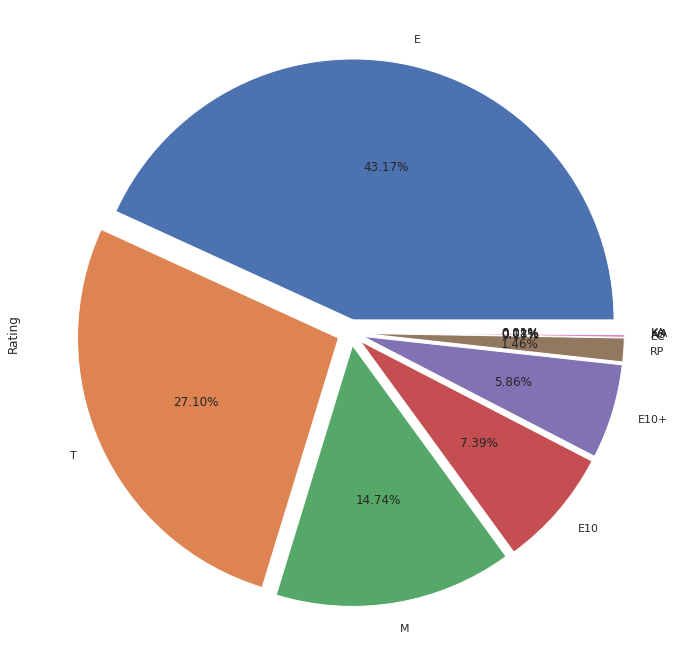

In [ ]:
vgsales.Rating.value_counts().plot.pie(autopct = "%0.2f%%",explode = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05])

Uma breve explicação retirada do site do ESRB para cada classificação:

Pela Classificação oficial da ESRB - https://www.esrb.org/ratings-guide/ , segue seu glossário ;

* E =>( Everyone)  Conteúdo generalizado para todas as idades, contendo mínimo de fantasia, violências ou animações em cartoons.

* E10 => Conteúdo mais adequada para acima de 10 anos podendo conter fantasia , violência ou animações me cartons mais frequentes de intensidade mínima

* T => ( Teens ) Conteúdo mais adequado para acima de 13, podendo conter fantasia, humor, sangue e uso frequente de expressões linguísticas.

* M => ( Mature ) Conteúdo mais adequada para acima de 17 anos podendo conter intensa violência , sangue e uso inadequado de expressões linguísticas .

*  A => ( Adults only) Conteúdo adequado para adultos acima de 18 podendo conter prolongadas cenas de violência, apostas , sangue e cenas expressivamente sexualizadas .

* RP => ( Rating Pending ) Classificação ainda pendente.

Alguns menos comuns são explicados abaixo:

* EC - Primeira Infância. Conteúdo geralmente adequado para maiores de 3 anos. Não contém material que os pais considerem inapropriado.
* K-A - Crianças para Adultos. O nome anterior da categoria de classificação * * 'E' para 'Todos'.
* RP - Classificação pendente. O jogo ainda não recebeu uma classificação final. Substituído assim que a classificação for atribuída
K-A foi renomeado para E em 1998. EC também foi descontinuado em 2018 devido à falta de uso, pois E também era aplicável a títulos com a classificação EC. Assim, para nossa exploração e análise, estaremos rotulando esses jogos para ter a classificação E para ser consistente com as classificações modernas.
Também notamos que as classificações de jogos só foram introduzidas em 1994, então muitos jogos antes dessa era podem não ter uma classificação.


In [ ]:
vgsales.replace(['K-A', 'EC'], 'E', True)
vgsales.replace(['E10+'], 'E10', True)
vgsales.Rating.value_counts()

E      10507
T       6569
M       3572
E10     3210
RP       355
AO        20
KA         3
Name: Rating, dtype: int64

Quanto aos jogos com RP, descobriremos manualmente essas classificações e as corrigiremos nós mesmos.

In [ ]:
vgsales.loc[vgsales.Rating == 'RP']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,User_Count,Developer,Rating,Global_Sales
13673,Clockwork Empires,PC,NaN,Strategy,Unknown,0.0,0.04,0.00,0.00,58.0,3.8,5.0,Gaslamp Games,RP,0.04
14272,Supreme Ruler: Cold War,PC,2011.0,Strategy,Paradox Interactive,0.0,0.03,0.00,0.01,63.0,6.8,27.0,BattleGoat Studios,RP,0.04
16182,WRC: FIA World Rally Championship,PC,NaN,Racing,Black Bean Games,0.0,0.01,0.00,0.00,65.0,NaN,NaN,Black Bean Games,RP,0.01
19147,Hollow Knight,PC,2017.0,Action-Adventure,Team Cherry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Team Cherry,RP,NaN
19658,Final Fantasy Type-0,PSP,2020.0,Role-Playing,Unknown,NaN,NaN,0.81,NaN,NaN,NaN,NaN,Square Enix,RP,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72430,Wreckfest,PS4,2019.0,Racing,THQ Nordic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bugbear Entertainment,RP,NaN
72431,Wreckfest,PC,2018.0,Racing,THQ Nordic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bugbear Entertainment,RP,NaN
72503,Lost Ember,PC,2019.0,Adventure,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mooneye Studios,RP,NaN
72504,Lost Ember,PS4,2019.0,Adventure,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mooneye Studios,RP,NaN


Existe diversos jogos com a classificação Adults Only em nosso banco de dados, 

In [ ]:
vgsales.loc[vgsales.Rating == "AO"]


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,User_Count,Developer,Rating,Global_Sales
875,Grand Theft Auto: San Andreas,XB,2005.0,Action,Take-Two Interactive,1.26,0.61,0.0,0.09,93.0,8.6,118.0,Rockstar North,AO,1.96
38454,Absolute Obedience,PC,2006.0,Misc,Jast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Langmaor,AO,NaN
42768,Cat Girl Alliance,PC,2008.0,Adventure,G-Collections,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sekilala,AO,NaN
44025,Critical Point,PC,2002.0,Adventure,Peach Princess,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sweet Basil,AO,NaN
44128,Crystal Fantasy,PC,2009.0,Misc,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,AO,NaN
46656,Enzai - Falsely Accused - eine falsche Beschul...,PC,2006.0,Misc,Jast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Langmaor,AO,NaN
51057,ioi,PC,2008.0,Misc,Westwood Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Well, let us see...",AO,NaN
51058,ioi 2: The Return of ioi,PC,1999.0,Role-Playing,Idea Factory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stellar Stone LLC,AO,NaN
51802,Kana Little Sister,PC,2002.0,Adventure,G-Collections,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D.O.,AO,NaN
53691,Manhunt 2,PC,2009.0,Action,Rockstar Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rockstar London,AO,NaN


In [ ]:
data.loc[data.Name == 'Grand Theft Auto: San Andreas']


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,User_Count,Developer,Rating
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,95.0,9.0,1588.0,Rockstar North,M
875,Grand Theft Auto: San Andreas,XB,2005.0,Action,Take-Two Interactive,1.26,0.61,0.00,0.09,93.0,8.6,118.0,Rockstar North,AO
2115,Grand Theft Auto: San Andreas,PC,2005.0,Action,Take-Two Interactive,0.00,0.93,0.00,0.04,93.0,8.9,1841.0,Rockstar North,M
10312,Grand Theft Auto: San Andreas,X360,2008.0,Action,Take-Two Interactive,0.08,0.02,0.00,0.01,NaN,7.5,46.0,War Drum Studios,M


Podemos ver como E é a classificação mais comum seguida de perto com T.
#$ Como a Classificação afeta as vendas?


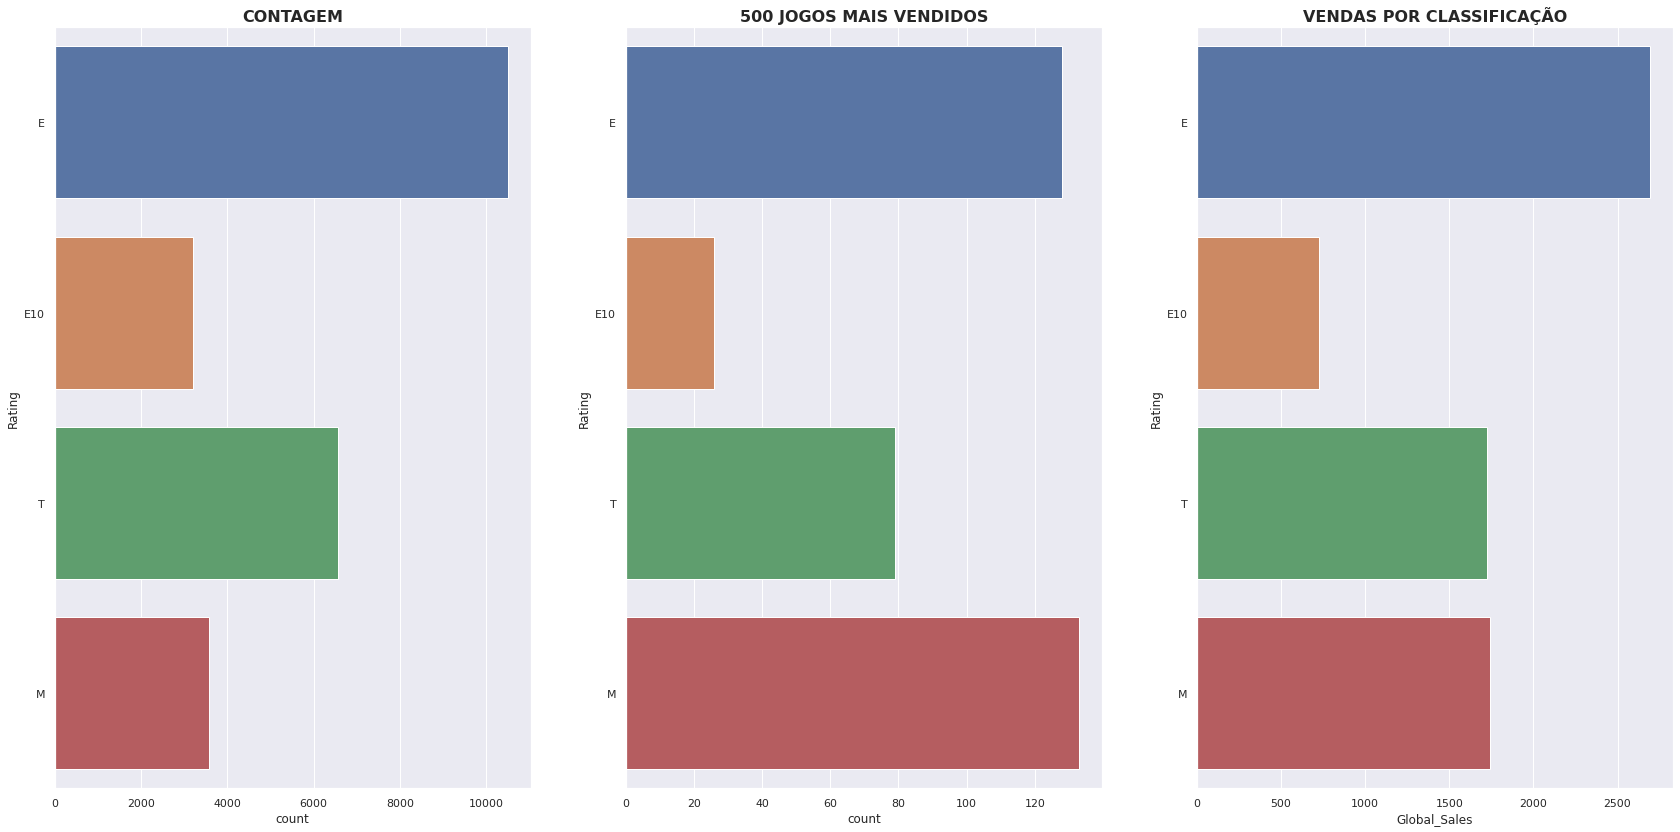

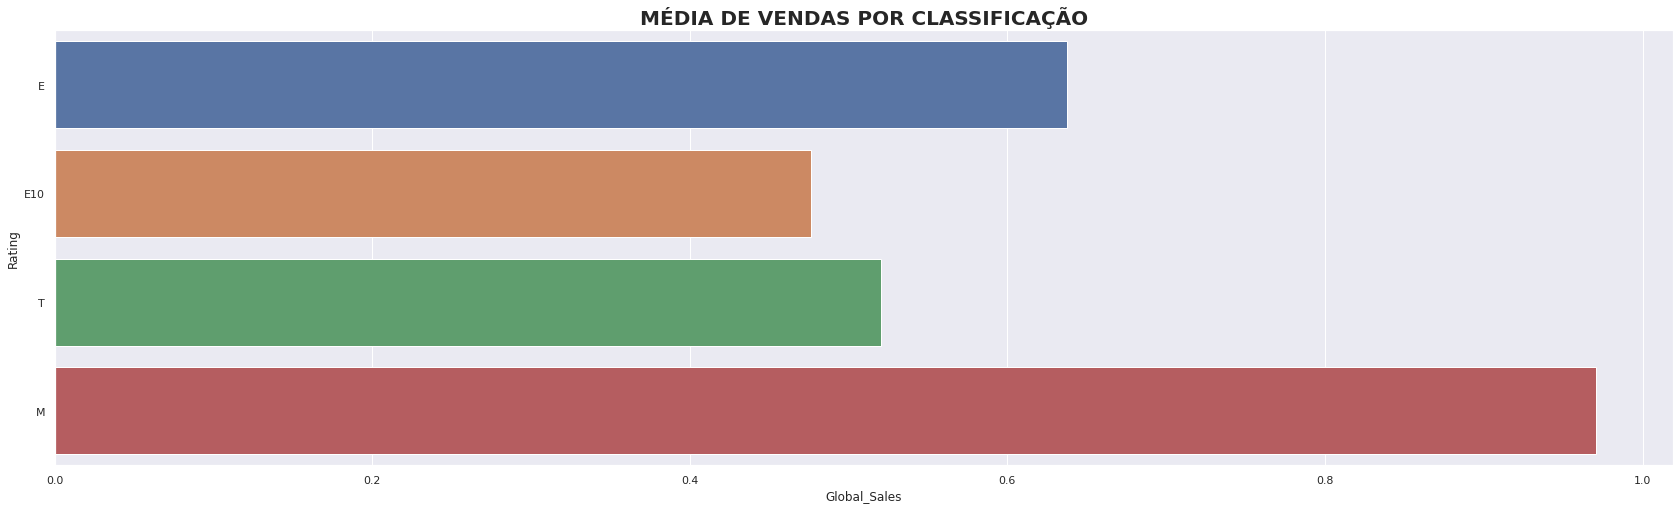

In [ ]:
rating_order = ['E', 'E10', 'T', 'M',] #ORGANIZANDO NOSSOS DADOS
plt.figure(1, figsize = [29,14]) # TAMANHO DO PLOT GERAL
plt.subplot(1,3,1) #SUBDIVIDINDO NOSSO PLOT EM 3 GRÁFICOS

# CONTAGEM DE CADA CLASSIFICAÇÃO
plt.title("CONTAGEM",size = 16, fontweight = 'bold')
sns.countplot(data=vgsales, y='Rating', order=rating_order)

#CONTAGEM DE CADA CLASSIFICAÇÃO DAS 500 VENDAS MAIS CARAS
plt.subplot(1,3,2)
plt.title("500 JOGOS MAIS VENDIDOS",size = 16, fontweight = 'bold')
sns.countplot(data=vgsales.sort_values('Global_Sales', ascending=False)[:500], y='Rating', order=rating_order)

# VENDAS GLOBAIS POR CLASSIFICAÇÃO
plt.subplot(1,3,3)
plt.title("VENDAS POR CLASSIFICAÇÃO", size = 16, fontweight = 'bold')
sns.barplot(data=vgsales.groupby('Rating', as_index=False).sum(), x='Global_Sales', y='Rating', order=rating_order)

# MÉDIA DAS VENDAS GLOBAIS POR CLASSIFICAÇÃO 

plt.figure(figsize=(29,8))
plt.title("MÉDIA DE VENDAS POR CLASSIFICAÇÃO", size = 20, fontweight='bold')
sns.barplot(data=vgsales.groupby('Rating', as_index=False).mean(), x='Global_Sales', y='Rating', order=rating_order)

Jogos classificados para adultos têm um valor médio muito mais alto para Vendas Globais do que todas as outras classificações.

As classificações têm um desempenho melhor ou pior em determinados consoles?

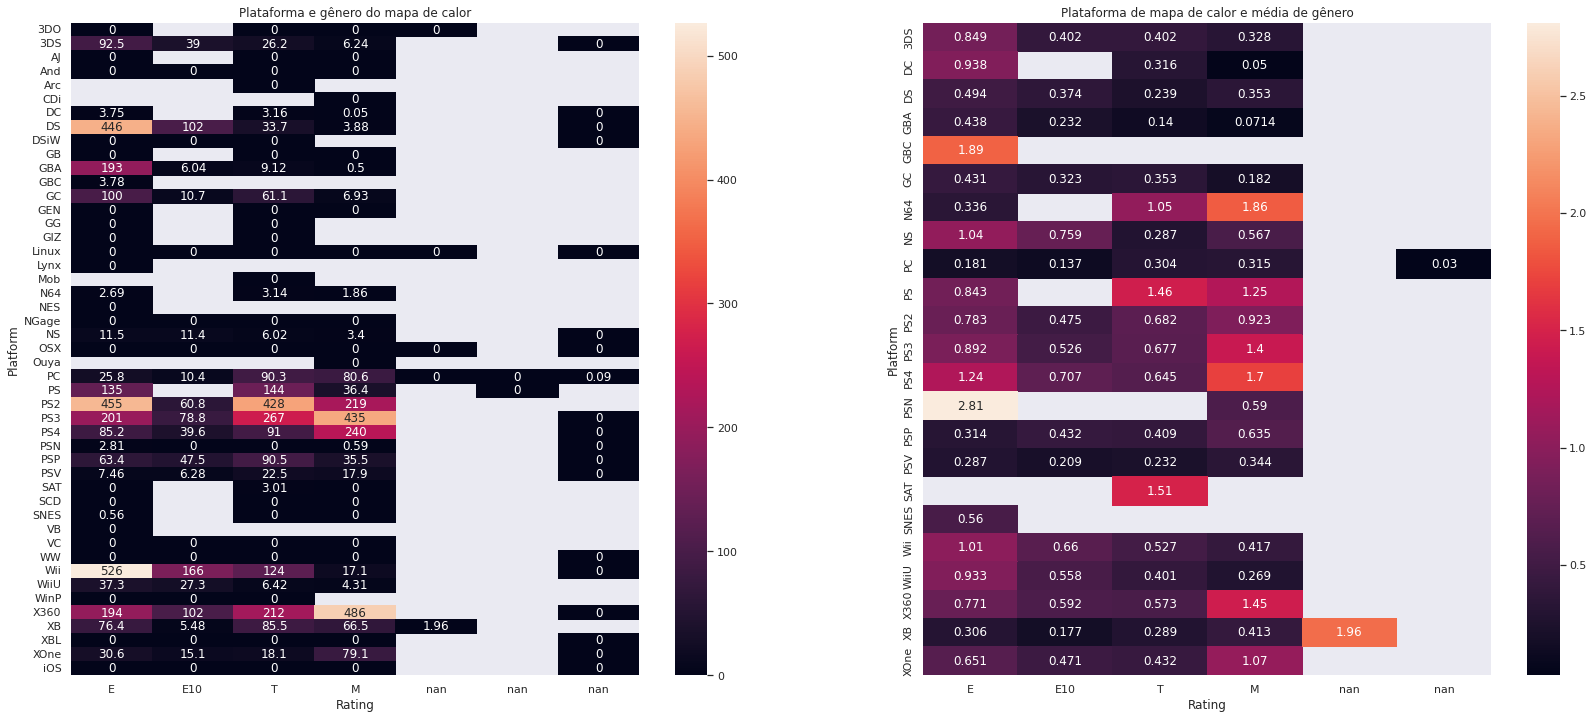

In [ ]:
# Create a pivot table, we will drop platforms without sales data in 3 or less genres

global_sales_rating_platform = vgsales.pivot_table(index='Rating', columns='Platform', values='Global_Sales', aggfunc=np.sum)
global_sales_mean_rating_platform = vgsales.pivot_table(index='Rating', columns='Platform', values='Global_Sales', aggfunc=np.mean)

global_sales_rating_platform.index = pd.CategoricalIndex(global_sales_rating_platform.index, categories=rating_order)
global_sales_rating_platform.sort_index(level=0, inplace=True)

global_sales_mean_rating_platform.index = pd.CategoricalIndex(global_sales_mean_rating_platform.index, categories=rating_order)
global_sales_mean_rating_platform.sort_index(level=0, inplace=True)

# Heat map of genres & platform
fig, axes_rating_platform_heatmap = plt.subplots(1, 2, figsize=(28,12))

axes_rating_platform_heatmap[0].set_title("Plataforma e gênero do mapa de calor")
sns.heatmap(data=global_sales_rating_platform.transpose(), ax=axes_rating_platform_heatmap[0], annot=True, fmt=".3g")

axes_rating_platform_heatmap[1].set_title("Plataforma de mapa de calor e média de gênero")
sns.heatmap(data=global_sales_mean_rating_platform.transpose(), ax=axes_rating_platform_heatmap[1], annot=True, fmt=".3g")

Alguns padrões claros podem ser vistos.

Os jogos maduros vendem melhor nos consoles Playstation e também razoavelmente bem nos consoles Xbox. Eles notavelmente têm um desempenho muito ruim na maioria dos outros consoles (com o PC sendo a exceção).

Os jogos para adolescentes seguem uma tendência semelhante aos jogos para adultos, mas em menor grau. As vendas na classificação de adolescentes são muito mais próximas, com menos consoles nos extremos, mas ainda tendem a vender um pouco melhor nos consoles Playstation.

Os jogos classificados como E e E10+ vendem razoavelmente na maioria dos consoles, embora pareçam de longe os melhores nos consoles da Nintendo, notadamente o Wii e o DS. Eles também vendem muito bem nos consoles Playstation. O PC notavelmente não vende jogos com classificação E tão bem quanto qualquer outro console, especialmente quando comparado com a métrica média de vendas globais.

Estes estão alinhados com o mercado geral para o qual essas plataformas tendem a ser. A Sony e a Microsoft tendem a comercializar a linha de consoles Playstation e Xbox para públicos mais velhos, enquanto a Nintendo tende a comercializar seus consoles para ter um apelo muito mais amplo.

Além das vendas, vejamos a relação entre gêneros e classificação.

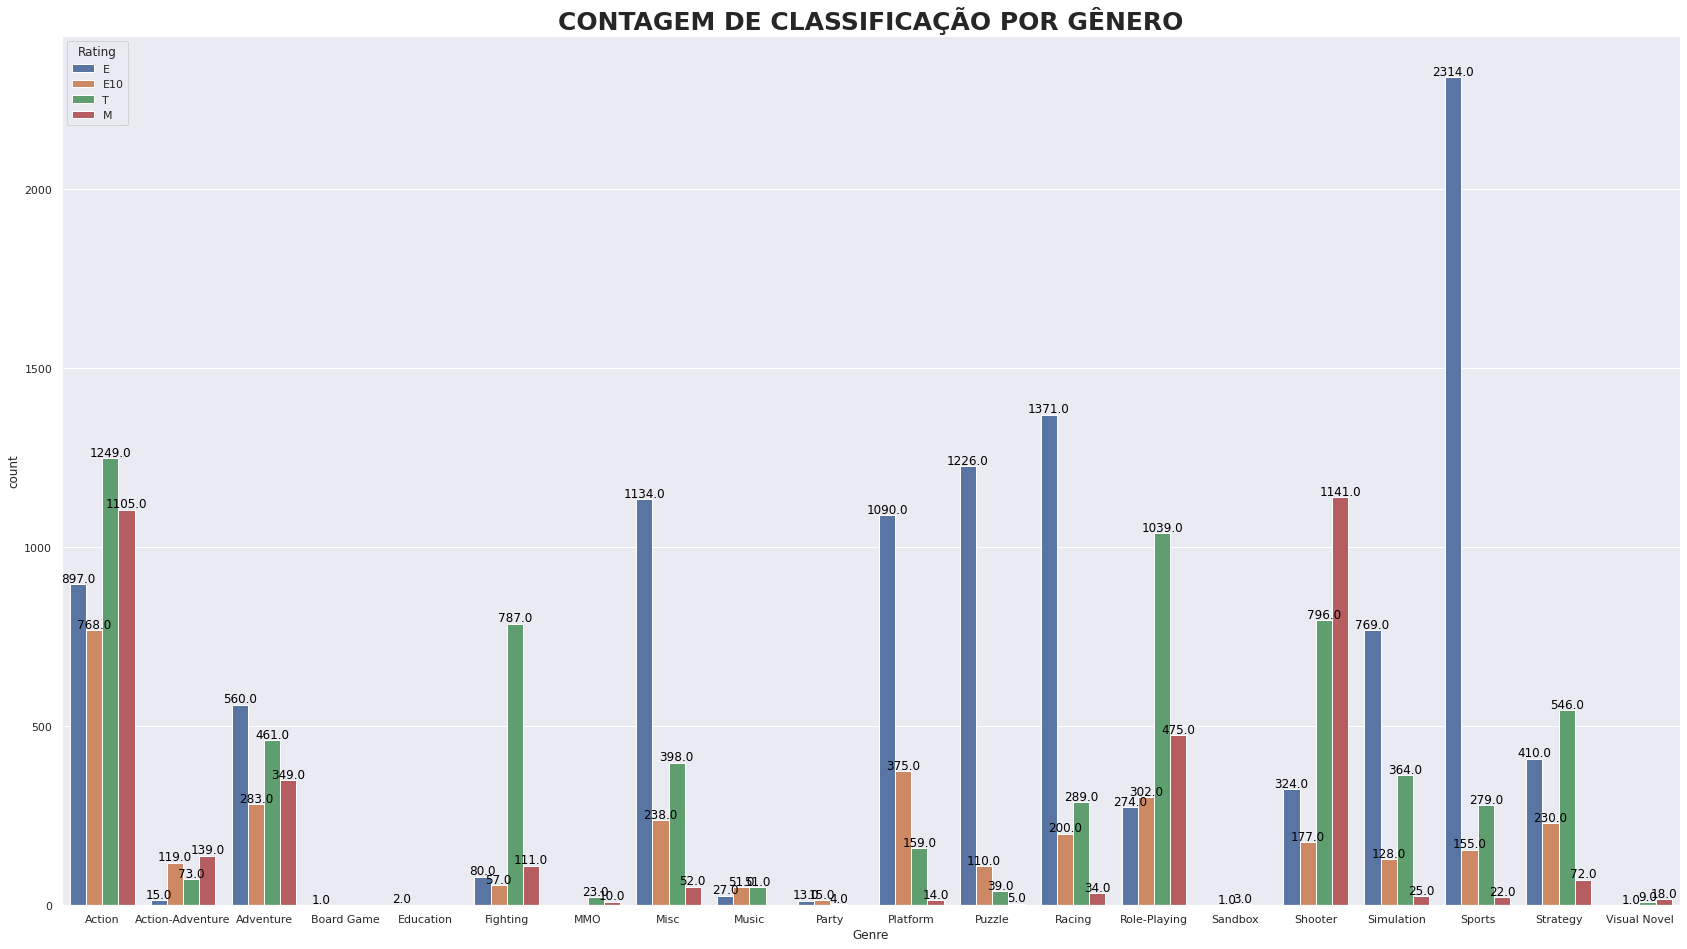

In [ ]:
# Count plot of genre and rating.

plt.figure(figsize=(29,16))
plt.title("CONTAGEM DE CLASSIFICAÇÃO POR GÊNERO", size = 25, fontweight ='bold')
plot = sns.countplot(data=vgsales, x='Genre', hue='Rating', order=sorted(vgsales.Genre.dropna().unique()), hue_order=rating_order)
for i in plot.patches:
  plot.annotate(i.get_height(),
                (i.get_x()+ i.get_width()/ 2 ,i.get_height()),
                ha ='center', va ='baseline', fontsize =12 ,
                color = 'black', xytext=(0,2),
                textcoords ='offset points'
                )


Existem correlações claras para jogos de um gênero específico receberem uma classificação.

Os jogos de aventura são bastante representativos.

Plataformas, quebra-cabeças, corridas, simulação, esportes e jogos diversos têm fortes tendências para jogos com classificação E.

Jogos de luta, RPG e estratégia são fortemente tendenciosos para classificações T.

A ação é ligeiramente tendenciosa para as classificações T e M, mas é bastante equilibrada.

Os atiradores são o único gênero fortemente tendencioso para classificações maduras. Isso faz sentido devido à tendência de incluir temas violentos.

# ANALISE DE DESENVOLVEDORES E VENDAS 

In [ ]:
vgsales.Developer.value_counts()

Unknown                 4571
Konami                   790
Sega                     754
Capcom                   641
Namco                    399
                        ... 
8MonkeyLabs                1
Palestar                   1
Dome Software              1
Silent Grove Studios       1
Outerloop Games            1
Name: Developer, Length: 8198, dtype: int64

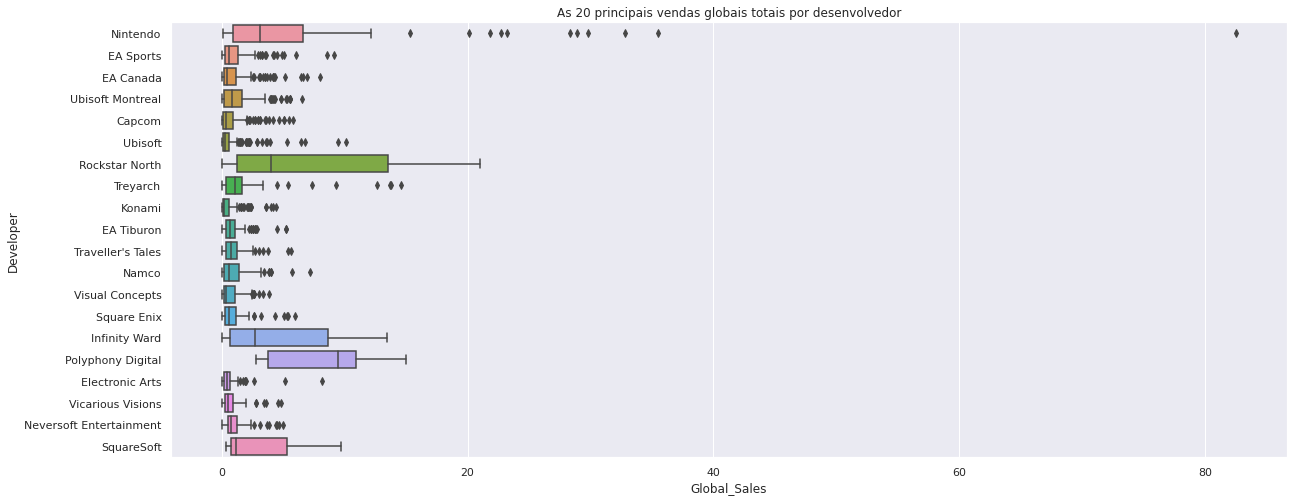

In [ ]:
plt.figure(figsize=(20,8))
plt.title("As 20 principais vendas globais totais por desenvolvedor")
sns.boxplot(data=vgsales[vgsales['Developer'].isin(top_developers_data['Developer'].values)] , x='Global_Sales', y='Developer', order=top_developers_data['Developer'])

A Nintendo tem vendas globais consideravelmente mais altas do que qualquer outra empresa. Parte disso se deve ao fato de outras empresas terem várias equipes de desenvolvedores com nomes diferentes. Por exemplo, a Electronic Arts tem muitas subsidiárias que podem ser vistas com EA no título.

Se considerarmos a soma de todos os desenvolvedores da EA, descobrimos que eles realmente têm vendas totais maiores do que a Nintendo.

In [ ]:
vgsales.dropna().loc[vgsales.Developer.str.contains(r"\b(?:EA|Electronic Arts)\b",case=False , regex=True).dropna()].Global_Sales.sum()

590.39

In [ ]:
vgsales.dropna().loc[vgsales.Developer.str.contains(r"\b(?:Nintendo)\b",case=False , regex=True).dropna()].Global_Sales.sum()

551.61

Podemos ver que a soma total de todas as vendas globais de qualquer desenvolvedor com EA ou Electronic Arts em seu nome é de 590,33 milhões de dólares em comparação com os 551,57 milhões de dólares da Nintendo

## Quais desenvolvedores consistentemente fazem os jogos mais vendidos?


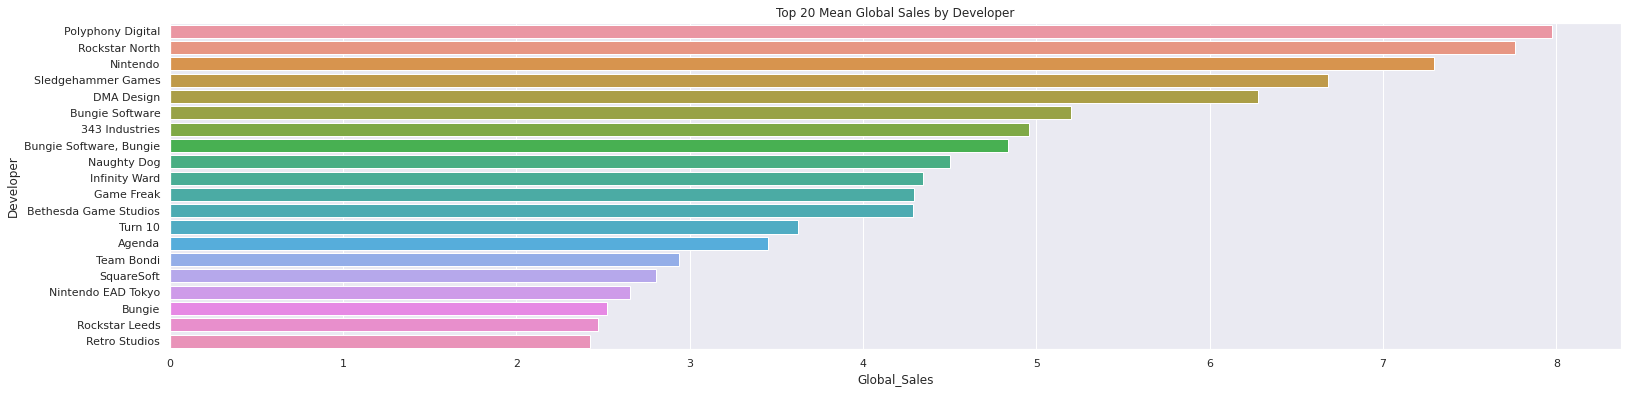

In [ ]:
vg_developer_counts = vgsales.Developer.value_counts()
frequent_developers_data = vgsales.loc[vgsales.Developer.isin(vg_developer_counts.index[vg_developer_counts.gt(5)])]

plt.figure(figsize=(26,6))
plt.title("Top 20 Mean Global Sales by Developer")
sns.barplot(data=frequent_developers_data.groupby("Developer", as_index=False).mean().sort_values('Global_Sales', ascending=False)[:20] , x='Global_Sales', y='Developer')

Adicionamos na cláusula ao analisar as vendas globais médias por desenvolvedor que eles devem ter pelo menos 5 jogos no banco de dados. Isso nos permite ver desenvolvedores que podem criar consistentemente os jogos mais vendidos, em vez daqueles que criaram um jogo que vendeu bem.

Polyphony Digital, Rockstar North e Nintendo estão no topo por uma margem considerável.

Uma possível razão pode ser que os desenvolvedores no topo da lista tenham criado séries populares. Assim, se um videogame da série vendeu bem, é razoável que outros videogames, muitas vezes sequências, também vendam bem.

Podemos ver dos seis principais desenvolvedores, todos têm uma ou mais séries populares:

Polyphony Digital criou a série Gran Turismo
Rockstar criou a série Grand Theft Auto
Nintendo criou a série Pokémon
A Bungie criou a série Halo e a série Destiny
A Bethesda criou a série Elder Scrolls e a série Fallout.
Como os desenvolvedores não têm nenhum outro jogo neste banco de dados, por sua vez, suas vendas globais médias são bastante altas. A Nintendo é uma exceção neste caso, enquanto as demais não têm mais de 10 jogos na lista, a Nintendo tem 72.
## Qual a classificação etária dos videogames desses desenvolvedores?

Curiosamente, uma grande proporção desses desenvolvedores mais vendidos cria jogos classificados para adolescentes e maduros. A Nintendo parece ser mais uma exceção à regra, representando 61% dos jogos com classificação E e E10+ criados por desenvolvedores com alta média de venda global

In [ ]:
high_mean_developers = frequent_developers_data.groupby("Developer", as_index=False).mean().sort_values('Global_Sales', ascending=False)[:20].Developer
vgsales.loc[vgsales.Developer.isin(high_mean_developers)].Rating.value_counts()

E      195
M      132
T       82
E10     20
RP       7
AO       1
Name: Rating, dtype: int64

In [ ]:
vgsales.loc[vgsales.Developer == "Nintendo"].Rating.value_counts()


E      121
E10     13
T        6
RP       5
Name: Rating, dtype: int64

# ANALISE DE PLATAFORMA E GÊNERO 

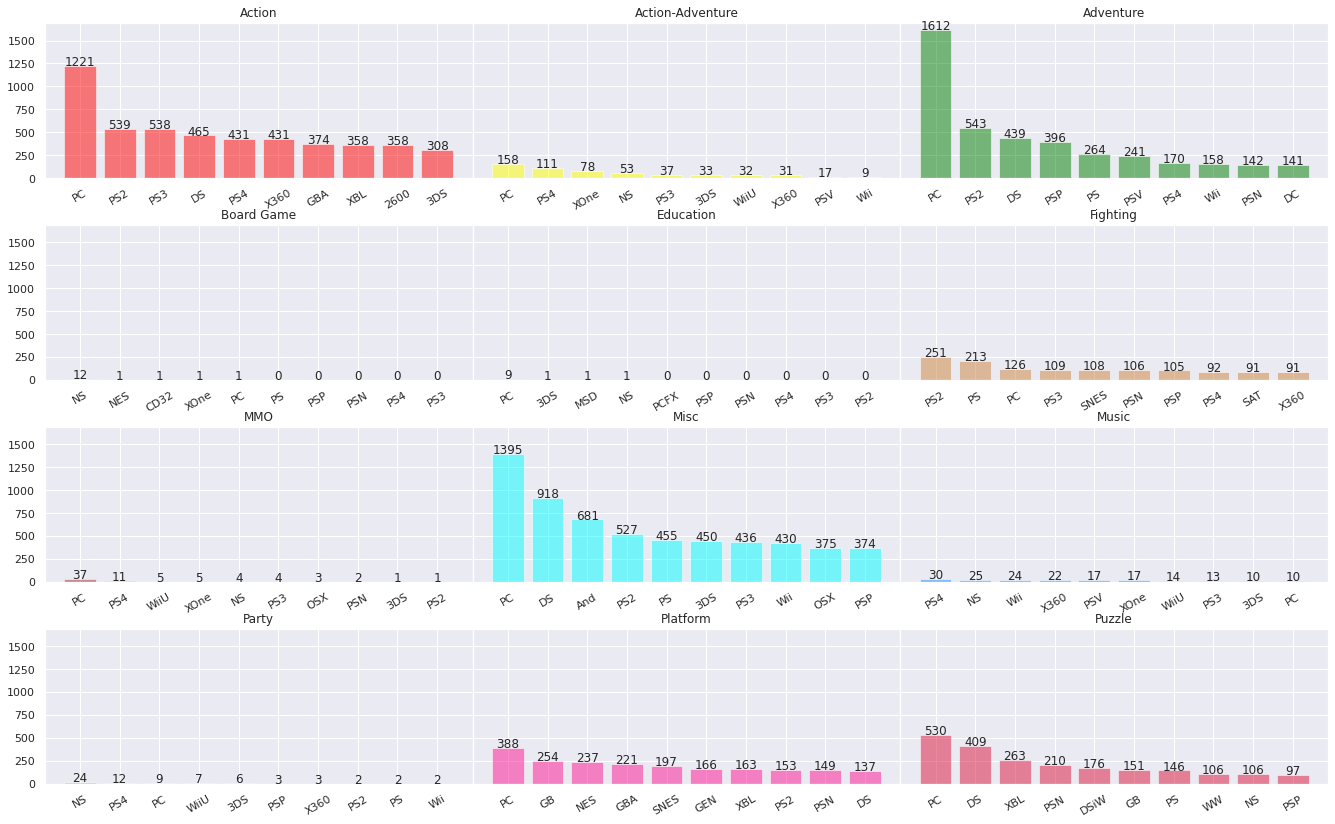

In [ ]:
res = pd.crosstab(vgsales['Platform'], vgsales['Genre'])
fig, axes = plt.subplots(4, 3, figsize=(23, 14), sharey=True)
#CORES = 
for i in range(4):
    for j in range(3):
        rec = res.iloc[:, i*3+j].sort_values(ascending=False)[:10]
        axes[i, j].bar(rec.index, rec.values, color= colors_genre[i*3+j] , alpha=0.5)
        axes[i, j].set_title(rec.name, fontsize=12)
        axes[i, j].tick_params(axis='x', rotation=30)
        add_bar_label(axes[i, j], rec, yincr=3, fontsize='medium')
fig.subplots_adjust(hspace=0.3, wspace=0)

Interpretação:

O gráfico acima mostra as 10 principais plataformas com mais jogos físicos publicados por gênero.

Por exemplo, podemos ver que o PS3 é a principal plataforma modal para Ação, pois 380 títulos exclusivos de jogos de ação são projetados para este console.

# ANALISE DE REGIÃO E JOGOS 

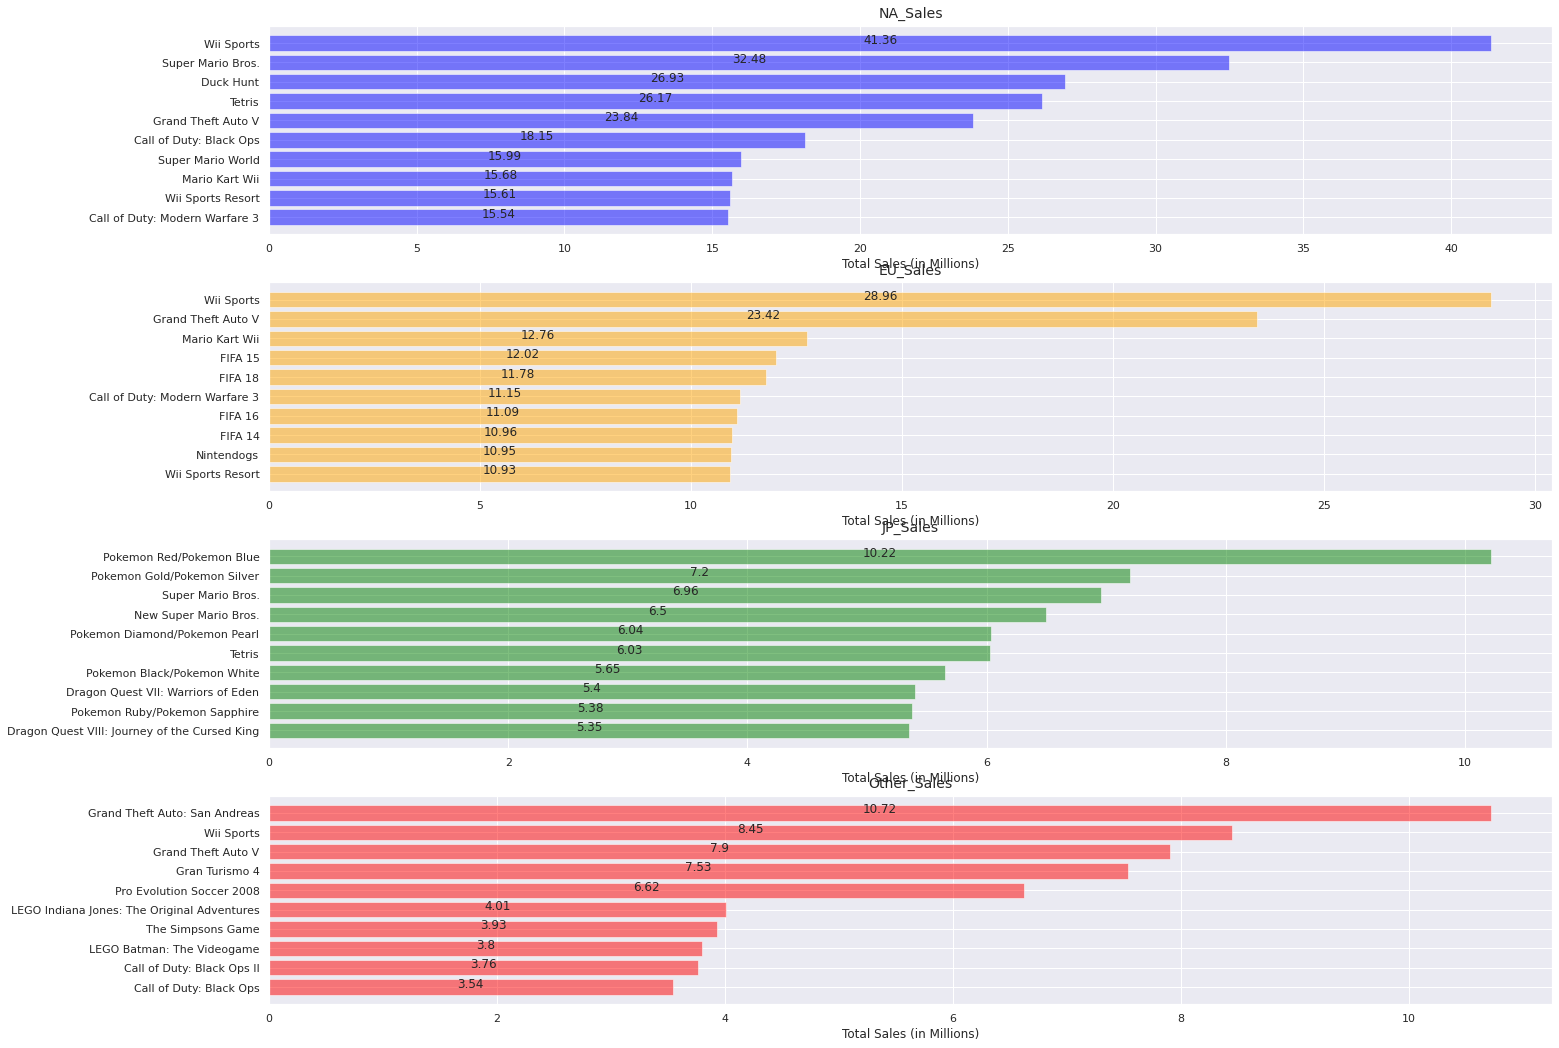

In [ ]:
# Top 10 games with highest sales for each region:
colors_region = ['blue', 'orange', 'green', 'red']
res = vgsales.groupby('Name')[['NA_Sales', 'EU_Sales', 
                                     'JP_Sales', 'Other_Sales']]
res = res.sum()
fig, axes = plt.subplots(4, 1, figsize=(23, 18))
for i in range(4):
    rec = res.iloc[:, i].sort_values()[-10:]
    axes[i].barh(rec.index, rec.values, color=colors_region[i], alpha=0.5)
    axes[i].set_title(rec.name, fontsize=14, y=1.01)
    axes[i].set_xlabel('Total Sales (in Millions)', fontsize=12)
    axes[i].tick_params(axis='x', labelsize=11)
    axes[i].tick_params(axis='y', labelsize=11)
    for j in rec.index:
        axes[i].text(rec.loc[j] / 2, j, round(rec.loc[j], 2), 
                     ha='center')
    #add_bar_label(axes[i], rec, xincr=0.8, isbarh=True)
fig.subplots_adjust(hspace=0.23)

3. Resumo e Conclusão
Em resumo, exploramos muitas facetas diferentes do mercado de videogames:

* Região: a América do Norte tem as vendas mais altas de todas as regiões
* Plataforma: PS2 e Xbox 360 têm as maiores vendas globais
* Multiplataforma: videogames com lançamentos multiplataforma podem vender de forma muito diferente dependendo do tipo de jogo.
* Gênero: O gênero de ação tem o maior total de vendas, mas por média de vendas, o gênero de plataforma tem o melhor
Gênero e plataforma: Certos gêneros têm um desempenho muito melhor nas plataformas cetrain. Mais notavelmente, videogames de plataforma no Nintendo Gameboy e NES, bem como jogos de ação no PS2, PS3 e Xbox 360
* Classificação: O videogame médio com classificação 'M' tem as vendas mais altas.
* Desenvolvedores: EA e Nintendo têm as vendas totais mais altas de qualquer desenvolvedor
* Pontuação: Ambos têm distribuições semelhantes com uma inclinação negativa.
* Jogos populares: Wii Sprots é o jogo mais vendido de todos os tempos, com vendas globais de US$ 82,53 milhões
Espero que você ache esta análise interessante e talvez útil para aqueles que estão procurando criar videogames no futuro


Observe que todos, exceto os jogos de tiro, têm uma tendência negativa; no entanto, para muitos dos gêneros, há um grande pico (um valor atípico) antes de 1995. Esse pico inicial nos dados está afetando a inclinação das tendências e não é tão relevante para as vendas recentes. Por precaução, a mesma análise pode ser realizada a partir de 1995 e ainda incluirá mais de 90% da venda global total

Mesmo depois de excluir os anos anteriores a 1995, todos os jogos, exceto Shooter, mostraram um declínio nas vendas. No entanto, após excluir os anos anteriores a 1995, a gravidade do declínio em todos, exceto no gênero esportivo, diminuiu. Dos gêneros em declínio, Simulação, RPG, Corrida e Jogos de ação tiveram o declínio mais acentuado nas vendas.

3.0 Conclusão Com exceção dos jogos de tiro, as vendas globais de todos os outros gêneros de videogame estão em declínio. Isso pode ser devido ao aumento de jogos sendo jogados em tablets e smartphones. Os jogos de tiro em primeira pessoa não são facilmente jogados com controles de tela sensível ao toque, fazendo com que não sejam afetados pelo aumento da popularidade do uso de tablets e smartphones como plataforma de jogos. Seria interessante encontrar um conjunto de dados que tivesse os downloads globais de jogos para tablets e smartphones e compará-lo com esse conjunto de dados.